In [27]:
import pandas as pd
import numpy as np

In [5]:
a = pd.read_csv('test_set_final.csv')
b = pd.read_csv('hotel_review_label1.csv')
data1 = pd.concat([a,b])

In [7]:
data1.to_csv('train_and_test.csv',encoding='UTF-8-sig')

In [10]:
df = pd.read_csv('train_and_test.csv')


In [53]:
df.reset_index(inplace=True)

In [ ]:
df = df.rename(columns={'index':'number'})

In [170]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis =1)


KeyError: "['Unnamed: 0' 'Unnamed: 0.1'] not found in axis"

<AxesSubplot:>

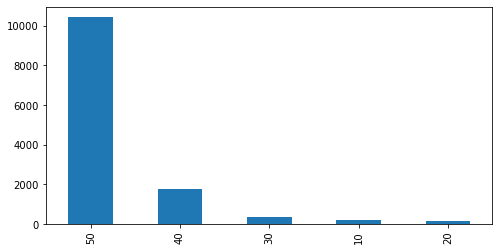

In [60]:
df.score.value_counts().plot(kind='bar',figsize =(8,4))

<AxesSubplot:>

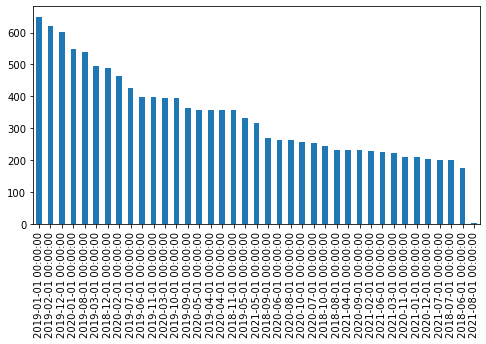

In [61]:
df.stay_date.value_counts().plot(kind='bar',figsize =(8,4))

In [74]:
# 날짜로 변환
import datetime

df.stay_date = df.stay_date.apply(lambda x : 
                                  datetime.datetime.strptime(x, '%Y-%m-%d') )


TypeError: strptime() argument 1 must be str, not Timestamp

In [80]:
df.dtypes

index                 int64
nickname             object
score                 int64
review               object
stay_date    datetime64[ns]
label1              float64
dtype: object

In [81]:
# 날짜로 정렬 
df_sort_date = df.sort_values(by=['stay_date'])
df_sort_date 

index     nickname  score  \
3617    3617       Jkyuan     40   
3571    3571       Gaon H     50   
3572    3572       sejeje     50   
3573    3573     Mihyun S     50   
3574    3574          JAM     50   
...      ...          ...    ...   
1486    1486      exdus72     10   
12973  12973         태구 강     10   
296      296        gabvu     40   
295      295  kidariazeoC     50   
294      294      juhl888     10   

                                                  review  stay_date  label1  
3617   역에서 가까워서 이동하기에도 좋고 조식에 쌀국수랑 오믈렛 완젼 짱짱 맛있었어요 빵도... 2018-06-01     1.0  
3571   구로에서 숙박을 해야할 경우 신라스테이 종종 이용하는데 갈때마다 가격대비 깔끔함과 ... 2018-06-01     1.0  
3572   호텔 도착하니 아늑해보이는 로비와 배정받은 객실의 침구가 너무 푹신하여 편안히 투숙... 2018-06-01     1.0  
3573   평소 신라스테이 자주 이용하는데 구로도 좋네요 어느 신라스테이를 가더라도 모든 직원... 2018-06-01     1.0  
3574   호캉스하러 신라스테이 다른 지점들 투숙해봤는데 이번에는 구로점에 투숙하게됐어요 역시... 2018-06-01     1.0  
...                                                  ...        ...     ...  
1486   실내수영장이 아니라 물놀이 시설이다 최소한 레인구분 하나정도는 해놔야 진짜 운동으로... 2021-07-01     NaN  
12973  좋다고 리뷰보고 왔는데 7월말 무척더운날에 처음 체크인하고 방에 들어와서 온도를 보... 2021-07-01     0.0  
296    전반적인 친절도와 시설관리는 좋았고 극성수기에 투숙객이 많으니 불편함은 감내하겠으나... 2021-08-01     NaN  
295    오래되었지만 깔끔하고 고급스럽고 친절하고 식음료파트 괜찮았고 전반적으로 좋았지만 체... 2021-08-01     NaN  
294    체크인 시스템 최악 일찍 도착한 게스트에게 호텔 맘대로 정한 시간부터 줄 서라고 하... 2021-08-01     NaN  

[12974 rows x 6 columns]

In [82]:
corona = datetime.datetime(2020,1,1)
# 코로나 이후 2020 2월
df1 = df_sort_date[df.stay_date> corona]
df1_review = df1.review
df1_review.to_csv('review1_train_and_test.txt',index=True, sep='\t')

<ipython-input-82-bc337528b074>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_sort_date[df.stay_date> corona]


In [193]:
# 코로나 이전 2020 1월
df2 = df_sort_date[df.stay_date<= corona]
df2_review = df2.review
df2_review.to_csv('review2_train_and_test.txt',index=True, sep='\t')

<ipython-input-193-b8dc8ee3af70>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df_sort_date[df.stay_date<= corona]


In [200]:
# 코로나 이후, 이전 데이터
print(len(df1), len(df2))

4887 8087


In [84]:
data1 = df.review
data1.to_csv('review_train_and_test.txt', index='True', sep='\t')

In [85]:
from konlpy.tag import Okt
from konlpy import jvm
from konlpy.corpus import kolaw
import nltk
from collections import Counter

twitter=Okt()

file = open("review_train_and_test.txt", 'r',encoding = "utf-8")
data = file.readlines()
file.close()
#data

word = ''
for line in data: 
    word = word + line + '\t'
#     print(twitter.nouns(line))
#print(word)

In [86]:
tokens_ko = twitter.nouns(word)

In [87]:
ko = nltk.Text(tokens_ko)
print(len(ko.tokens))      # 토큰 전체 갯수 
print(len(set(ko.tokens))) # 토큰 unique 갯수

295344
11326


In [91]:
ko.vocab().most_common(200)

## 비슷한 키워드 내가 직접 합쳐서 새로운 데이터 프레임 생성하기!


# 분위기 단어 분석 분위기 앞에 붙은 형용사 가져오기 (분위기와 연관된 단어 분석) -> word embedding
# 코로나 이후 호텔 내부에 머무는 시간 증가 > 고객이 분위기를 신경 더씀?.

# '다만'이 포함된 리뷰 -> 아쉬운 부분/ 요청사항/ 부족한 점 언급함 -> 따로 분석 코로나 전후로  아쉬운 부분이 달라지는가? 
# '요청' 고객의 요청 내용 정리 및 코로나 전후 요청사항이 달라졌나 확인 

# '아침' -> 투고박스/도시락/ 룸서비스 # 코로나 이후 조식을 배달 받아서 먹는 것 제안 >> 음식 퀄리티 및 고급스러움 더욱 신경 써야함


[('호텔', 7595),
 ('직원', 6115),
 ('객실', 3432),
 ('이용', 3377),
 ('방문', 3304),
 ('다음', 2658),
 ('시설', 2511),
 ('것', 2413),
 ('체크', 2407),
 ('위치', 2399),
 ('또', 2396),
 ('룸', 2380),
 ('뷰', 2322),
 ('서비스', 2317),
 ('조식', 2168),
 ('때', 2161),
 ('수', 2054),
 ('신라', 1989),
 ('정말', 1988),
 ('스테이', 1870),
 ('여행', 1727),
 ('곳', 1721),
 ('롯데', 1564),
 ('가족', 1454),
 ('투숙', 1441),
 ('방', 1404),
 ('가격', 1395),
 ('생각', 1393),
 ('층', 1353),
 ('더', 1334),
 ('아이', 1333),
 ('수영장', 1285),
 ('최고', 1273),
 ('추천', 1264),
 ('기분', 1261),
 ('예약', 1256),
 ('매우', 1255),
 ('컨디션', 1239),
 ('시간', 1199),
 ('바로', 1198),
 ('다시', 1139),
 ('침구', 1122),
 ('아주', 1117),
 ('침대', 1116),
 ('숙박', 1078),
 ('서울', 1051),
 ('주변', 1039),
 ('호캉스', 1001),
 ('모두', 991),
 ('친구', 988),
 ('앞', 973),
 ('점', 934),
 ('조금', 869),
 ('처음', 865),
 ('좀', 842),
 ('해운대', 831),
 ('쉬', 828),
 ('근처', 826),
 ('부산', 816),
 ('응대', 809),
 ('프론트', 788),
 ('분', 786),
 ('숙소', 775),
 ('음식', 770),
 ('비', 767),
 ('안내', 752),
 ('등', 750),
 ('상태', 737),
 ('박', 723

In [201]:
stop_words =['것','호텔','이용','방문','다음','것','또','때','수', '신라','정말','스테이',
            '곳','롯데','투숙','생각','층','더','최고','추천','기분','매우','시간','바로',
            '다시','아주', '숙박','서울','호캉스','모두','앞', '점', '조금','처음','좀',
            '해운대', '쉬','근처','부산','분','숙소', '비','등','상태', '박','재','느낌',
            '정도','덕분','마음','다른','번','선택', '이번','꼭','때문','역시','무엇','저','제',
            '하나','다만','울산', '하루', '사람','시티','모든','항상', '이','말','그','또한','만족',
            '자주','의사', '안','월드','날','한번','거리','및']

tokens_ko = [each_word for each_word in tokens_ko
            if each_word not in stop_words]

ko = nltk.Text(tokens_ko)
ko.vocab().most_common(100)

[('직원', 6115),
 ('객실', 3432),
 ('시설', 2511),
 ('체크', 2407),
 ('위치', 2399),
 ('룸', 2380),
 ('뷰', 2322),
 ('서비스', 2317),
 ('조식', 2168),
 ('여행', 1727),
 ('가족', 1454),
 ('방', 1404),
 ('가격', 1395),
 ('아이', 1333),
 ('수영장', 1285),
 ('예약', 1256),
 ('컨디션', 1239),
 ('침구', 1122),
 ('침대', 1116),
 ('주변', 1039),
 ('친구', 988),
 ('응대', 809),
 ('프론트', 788),
 ('음식', 770),
 ('안내', 752),
 ('라운지', 713),
 ('로비', 702),
 ('가성', 651),
 ('방도', 643),
 ('코로나', 631),
 ('주차', 629),
 ('분위기', 615),
 ('체크아웃', 568),
 ('업그레이드', 565),
 ('화장실', 541),
 ('어메니티', 540),
 ('요청', 502),
 ('전망', 490),
 ('접근성', 489),
 ('공항', 455),
 ('대비', 453),
 ('바다', 452),
 ('출장', 451),
 ('청소', 446),
 ('아침', 439),
 ('저녁', 433),
 ('사용', 430),
 ('욕조', 423),
 ('중', 422),
 ('여기', 420),
 ('친절', 413),
 ('부분', 413),
 ('주차장', 408),
 ('식당', 407),
 ('교통', 405),
 ('맘', 405),
 ('저희', 403),
 ('오션', 401),
 ('전반', 400),
 ('전체', 399),
 ('기억', 397),
 ('맛집', 396),
 ('편의점', 395),
 ('식사', 392),
 ('제주', 390),
 ('감동', 384),
 ('류', 383),
 ('도', 383),
 ('가장', 380),
 ('

In [121]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

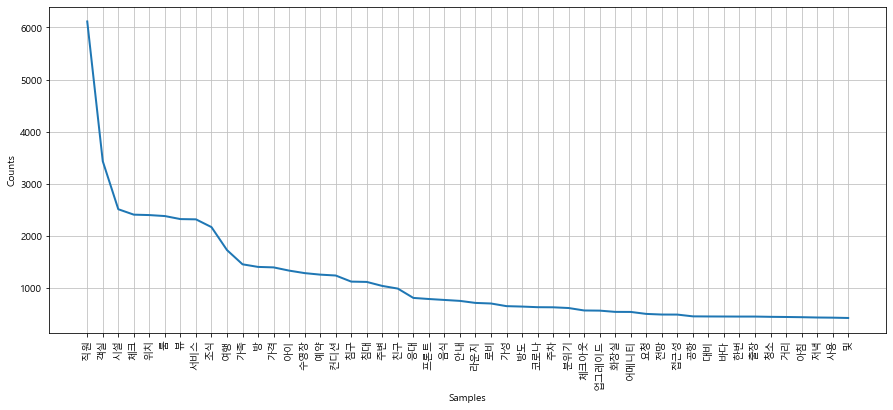

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

In [204]:
# '중에서' 포함된 리뷰 
#-> 1. 범위가 어디인지 1)시티호텔중(호텔 종류)(비즈니스/..) 2) 그 지역/근방/주변 3) 자신의 경험, 
# 2.어떤 부분이 가장 좋았는지 분석
for text in df.review:
    if '중에서' in text:
        print( text,'\n')
        

객실 종류 City View Room  지하철에서 좀 거리가 있긴 하지만 위치는 여의도에서 더 좋을 수가 없다 IFC몰에 지하로 바로 연결되어 있고 길건너에 최근에 문을 연 현대 백화점이 있다 다만 IFC 오피스 빌딩이 너무 가까워서 창문에서 건너편 사무실이 잘 보이는 편이다 그쪽에서도 호텔 객실이 잘 보이지 않을까 그런데도 욕실에 객실 창쪽으로 창을 뚫어뒀다 블라인드나 커튼도 없이 그 축에 화장실도 있다 화장실  욕조  욕실 유리창  방 유리창  건너편 사무실 유리창이 일직선으로 연결된다 화장실에 다행히 불투명처리된 유리문이 있긴한데 객실 블라인드를 내리지 않으면 건너편 사무실에서 객실창과 욕실창을 통해서 내가 화장실에 들어가는 모습과 문을 닫아도 볼일을 보는 모습이 문에 비치지 않을까하는 불안감이 든다 욕실창 아니더라도 호텔이 맞은 편 사무실들에 불안감을 느낄 정도로 너무 가까워 커튼이나 블라인드를 치지 않을 수가 없다  건물 설계를 할때 호텔 목적이 분명했다면 IFC 오피스 빌딩들과 같이 설계되었을테고 그럼 서로 가까이서 마주보게 된다는 걸 분명히 알았을 것이고 그러면 객실 창을 여의도 공원쪽을 향하게 톱니 모양으로 만들었어야 했을텐데 객실에 프라이버시에 대한 고려가 건물 설계단계에서부터 부족했고 그런 부주의함이 객실 인테리어에까지 이어진 것 같다  로비는 서울에 있는 호텔들중에서도 최고에 속하는 웅장함을 선사한다 다만 거기에 힘을 너무 썼는지 객실 인테리어에는 무늬목을 너무 과도하게 사용한 느낌이다 무늬목의 감촉도 좋지 않고 호텔이 문을 연지 10년이 되어가는 것 같은데 아직도 가까이 가면 냄새가 별로인 부분도 있다  럭셔리 호텔은 모든 면에서 일상에서의 경험을 넘어서는 고급스러움을 투숙객들에게 선사해야할 의무가 있다고 본다 이 측면에서 콘래드 서울은 고급스럽지 않은 무늬목의 과도한 사용과 프라이버시에 대한 부주의함으로 그 의무를 다하지 못했다  좋은 점  방과 욕실이 넓다  IFC에 바로 연결 지하철역이 멀긴한데 지하로 오갈 수 있다  TV는 매우 만

## 특정 토큰 포함된 리뷰 출력해보기! 

In [311]:
from konlpy.tag import Hannanum

hannanum = Hannanum()

def tokenizer(row):
    return hannanum.morphs(row)

df['review_token']=df['review'].apply(tokenizer)
df.head()

for i, token in enumerate(df['review_token']):
    print(i, token) 

0 ['이그제큐티브', '라운지', '칵테일', '뷔페', '는', '생각', '보다', '널', 'ㅁ', '별', '로이', '었어', '요', '메뉴', '가', '얼마', '없', '어서', 'ifc', '몰', '에서', '또', '따로', '저녁', '사먹었습니다', '한강뷰', '는', '아주', '좋', '아아']
1 ['직원분', '들', '모두들', '너무', '친전하', '이', '셨고', '말', '하', '지', '않', '아', '무엇', '이', '필요', '하', 'ㄴ지', '먼저', '오퍼해', '주셨어요프론트', '에', '계시', 'ㄴ', '분', '체크인시', '가습기', '티피텐트', '등등', '알', '아', '다', '방', '에', '넣', '어', '주', '셨고', '룸써비스', '도', '스파게티', '빼', '고', '치키', 'ㄴ', '퀘사디아', '와', '미역국', '널', 'ㅁ', '맛있', '었어', '요', '단지', '남편', '이', '어때', '에', '타투', '가', '있', '는데', '수영장', '에서', '윗옷', '을', '입', '어야', '한다거', '하', '어서', '그것', '은', '점', '그랬네요다른', '오성급', '어느', '호텔', '에서도', '그러', 'ㄴ', '요구', '를', '하', 'ㄴ', '적', '은', '없었거든요여튼', '수영', '하고', '싶', '어서', '아이', '와', '이', '호텔', '을', '고르', '시ㄴ다면', '비추여핫터브', '가', '없', '어서', '오래', '놀', '기', '엔', '춥', '기', '도', '하', '고요']
2 ['가격대비', '메리크', '가', '없', '으며', '이제', '는', '가격', '을', '어느정도', '지불', '하', '어야', '지만', '앞', '의', '조망', '을', '즐기', 'ㄹ', '수', '있', '네', '요', '가격대비', '받', '은', '서비스',

1088 ['15개월', '아기', '와', '함께', '오', 'ㄴ', '첫', '여행', '이', 'ㄴ데', '시설', '이', '깨끗', '하고', '좋', '네', '요', '서머셋', '과', '고민', '하', '다가', '겨울', '이', '라', '동선', '이', '좀', '더', '짧', '은', '메리어트', '로', '오', '아ㄴ데', '시설', '이', '깔끔', '하고', '실내수영장', '도', '이용', '하', 'ㄹ', '수', '있', '어', '좋', '아ㅂ니다', '침대', '도', '푹신', '하고', '트윈룸', '묵', '었는데', '넓', '고', '편안히', '있', '었습니다', '겨울', '이', '기', '도', '하', '고', '아이', '도', '어리', '어서', '외부시설', '은', '많', '이', '이용', '하', '어', '지', 'ㄴ', '못하', '었지', '말', 'ㄴ', '날', '이', '풀리', '고', '시설', '들', '이', '다', '지', '어', '지', '면', '엄청', '좋', '을', '것', '같', '네요']
1089 ['오픈한지', '얼마', '안되서인지', '룸컨디션', '이', '깔끔', '하고', '직원', '응대', '가', '친절', '하', '어서', '좋', '아ㅂ니다', '패키지', '로', '제주항공우주박물관', '과', '태마파크', '할인이용권', '이', '있', '어서', '잘', '이용', '하', '었습니다', '주변', '에', '거리', '가', '가깝', '은', '곳', '이', '가', 'ㄹ', '만', '하', 'ㄴ', '곳', '이', '많', '아', '좋', '더군', '요']
1090 ['오랫만', '에', '짧', '지', '말', 'ㄴ', '행복한가족', '여행', '을', '만들', '어', '주', 'ㄴ', '신화', '리조트', '이', '었습니다', '찜질방', '도', '좋', '아고', '수영장',

1730 ['모든', '시설이용', '및', '서비스', '가', '완벽', '하', '었음', '직원역시', '친절해', '서', '이용', '하', 'ㄴ데', '불편', '이', '전혀', '없', '었음', '객실', '의', '광안대교', '뷰', '역시', '분위기', '를', '내', 'ㄴ데', '매우', '적합', '하', '었음']
1731 ['퀄리티좋고', '만족', '스럽', '었어', '요', '다만', '조식', '이', '다소', '입', '에', '안맞았습니다', '그', '외', '에', '수영장', '과', '다르', 'ㄴ', '시설들', '은', '좋', '아고', '엘리베이터', '이용', '이', '귀찮', '아', '불편', '하', '었던', '것', '같', '네요']
1732 ['생일', '맞', '아', '방문', '하', '었었는데', '역시', '너무', '좋', '더라구', '요', '광안대교뷰', '는', '호텔어디서', '나', '보', 'ㄹ', '수', '있', '다', '고', '하', '어서', '요트뷰', '로', '하', '었는데', '요트뷰', '도', '너무', '좋', '아아']
1733 ['남편', '과', '같', '이', '갑자기', '가', '게', '되', 'ㄴ', '부산여행', '이', '었지만', '파크하얏트', '덕분', '에', '편안', '하', '게', '즐겁', '은', '여행', '이', '되', '었습니다', '넓직한', '옷장', '화장실', '세면대2개', '욕조', '샤워실', '이', '각각', '분리', '되', '어', '있', '어', '좋', '습니다', '특히', '광안대교', '와', '요트', '항만', '보이', '는', '바닷가', '경치', '도', '좋', '아ㅂ니다', '단지', '아파트', '옆', '에', '호텔', '이', '있', '는', '것', '이', '조금', '거슬리스는것', '같', '습니다', '남편', '은', '조식',

2480 ['여자친구', '에게', '프로포즈', '를', '하', '기', '위하', '어', '글래드호텔', '에', '투숙', '하', '게', '되', '었습니다', '처음', '방문', '하', '는', '호텔', '이', '어서', '설렘반', '걱정반', '이', '었는데', '글래드호텔', '직원분', '께서', '너무', '친절', '하', '게', '응대', '를', '잘', '하', '어', '주', '시어서', '너무', '도', '좋', '은', '추억', '을', '만들', 'ㄹ', '수', '있', '었습니다', '특히', '저', '를', '응대', '하', '어', '주', '셨던', 'Ariel', '직원님', '너무너무', '감사드리', '고요', '멋지', 'ㄴ', '프로포즈', '하', 'ㄹ', '수', '있', '게', '돕', '어', '주', '시어서', '감사', '하', 'ㅂ니다', '소중', '하', 'ㄴ', '추억', '만들', '고', '가', 'ㅂ니다', '감사', '또', '감사', '하', '어', '요', 'Ariel', '님']
2481 ['여의도글래드', '지난주말', '에', '이용', '하', '었습니다', 'Hannah', '프론트', '직원분', '너무고마워요', '좋은방', '으로', '주', '시어서', '잘', '묵', '고', '가', 'ㅂ니다', '지난번', '에', '이용', '하', 'ㄹ', '때', '도', '좋', '아ㄴ데', '이번', '엔', '더', '좋', '아아', '요', '주변', '호텔', '에', '비하', '어서', '가장', '좋', '은', '침구', '편안', '하', '게', '자', 'ㄹ', '쉬', '이', '었네요']
2482 ['생일', '이', '라', '여자친구', '랑', '방문', '하', '었는데', '호텔', '분위기', '도', '좋', '고', '룸', '최고', '이', '고', '조식', '도', '너무', '맛있', '었어'

3356 ['합리적', '이', 'ㄴ', '가격', '에', '시내', '에', '바로', '위치해', '있', '어', '요', '특히', '바로', '앞', '에', '정류장', '이', '있', '어서', '관광지', '로', '이동하기', '에는', '최적', '6일', '동안', '너무', '편하', '게', '묵', '다가', '갑니당', '바로', '맞은편', '에', '맛있', '는', '카페', '와', '수상경력', '있', '으시ㄴ', '빵집', '도', '있', '어', '요', '위치', '와', '시설', '굳굳']
3357 ['1', '4', '이', 'ㄴ', '가족', '이', '온돌방', '1개', '로', '여행', '을', '하', 'ㄹ', '수', '있', '는', '호텔욕조', '는', '없', '으나', '샤워', '는', '가능', '2', '욕조', '를', '원하', 'ㄴ다면', '스위트룸', '을', '계약', '하', '세', '요', '3청소', '는', '적절', '하', '게', '하', '어', '주', 'ㅂ니다', '미비', '하', 'ㄴ', '점', '이', '있', '다면', '연락', '하', '면', '해결', '하', '어', '주', 'ㅂ니다', '4식사', '는', '부페', '가능', '하고', '가성비', '괜찮', '고', '음식', '의', '간', '도', '적절', '하', 'ㅂ니다', '5로비', '에', '스타벅스', '가', '있', '습니다', '6', '중형차', '를', '위하', 'ㄴ', '공간', '이', '상대적', '으로', '적', '어', '경차', '또는', '소형', '렌트카', '가', '주차', '에', '유리', '하', 'ㅂ니다', '7호텔', '바로', '옆', '에', '편의점', '이', '있', '어서', '필요', '하', 'ㄴ', '물품', '을', '쉽', '게', '사', 'ㄹ', '수', '있', '고', '가깝', '은', '곳',

4207 ['걷', '어서', '바로', '3분거리', '에', '있', '는', '롯데월드', '타워', '아쿠아리움', '쇼핑몰', '등', '가족단위', '여행', '으로', '최적', '이', 'ㄴ', '곳', '이', 'ㅂ니다', '직원들', '도', '굉장히', '친절하시', '이', '고', '체크아웃', '을', '하', 'ㄴ', '뒤', '에도', '지', 'ㅁ', '을', '맡기', 'ㄹ', '수', '있', '어서', '다음날', '저녁', '까지', '여유', '롭', '게', '시간', '을', '보내', 'ㄹ', '수', '있', '었습니다', '라세느', '저녁식사', '와', '조식', '모두', '훌륭', '하고', '객실', '내부', '도', '넓', '고', '욕실', '도', '쾌적', '하', 'ㅂ니다']
4208 ['업무차', '방문했던곳', '위치상', '타워', '도', '갔다오', 'ㄹ', '겸', '곳', '이', 'ㄴ데', '아주', '만족', '하', '었습니다', '특히', '객실', '이', '아주', '깨끗', '하고', '관리', '가', '잘된느낌', '을', '받', '아아', '요', '부대시설', '도', '모두', '있', '어서', '투숙', '하', '기', '에', '딱', '좋은곳', '이', '라', '생각드', '이', '네', '요', '가족', '이랑', '겨울', '에', '한번', '더', '오', 'ㄹ', '예정', '이', 'ㅂ니다', '그리고', '라세느', '너무', '맛있', '었습니다', '객실베드', '는', '진짜', '꿀잠잘수있었어요']
4209 ['아들', '의', '제안', '으로', '가족', '끼리', '조용히', '생일', '을', '보내기위해', '롯데호텔', '에', '방문', '하', '었다', '4인가족', '이', '일반', '객실', '에서', '묵', '기', '에', '좀', '비좁을꺼', '같', '아', '직원', '에게', '문의'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [312]:
# 리뷰들 중 최대/ 평균 토큰 개수 
a =[]
for i in df['review_token']:
    a.append(i)

b =[]
for i in df['review_token']:
    b.append(len(i))
print(max(b),sum(b)/len(b))

TypeError: 'int' object is not callable

## 단어 임베딩(word embedding)
gensim이라는 모듈을 이용해 손쉽게 Word2vec 임베딩을 진행할 수 있었다.\
option중에 size : 출력 차원, min_count : 지정한 수보다 빈도가 작으면 무시, \
sg : 1이면 skip-gram / 0이면 CBOW 알고리즘 사용
마지막 결과와 같이 키워드를 입력하면 유사한 텍스트를 10개 출력해준다.



vector_size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원. \
min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)\
workers = 학습을 위한 프로세스 수\
sg = 0은 CBOW, 1은 Skip-gram.


In [306]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = df['review_token'], vector_size =100, min_count=0, workers =4, sg=1)



model_result = model.wv.most_similar("분위기")
print(model_result)

[('고급진', 0.8506655097007751), ('화려', 0.8346556425094604), ('아늑', 0.8331780433654785), ('인테리어', 0.8314011096954346), ('심플하', 0.8312061429023743), ('심플한', 0.8301858901977539), ('고급지고', 0.8284805417060852), ('업', 0.8284541368484497), ('클래식', 0.82457435131073), ('디자인', 0.8237623572349548)]


In [307]:
#4) Word2Vec 모델 저장하고 로드하기
#공들여 학습한 모델을 언제든 나중에 다시 사용할 수 있도록 컴퓨터 파일로 저장하고 다시 로드해보겠습니다.
# 이 모델을 가지고 시각화 챕터에서 시각화를 진행할 예정이므로 꼭 저장해주세요.

from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드


#로드한 모델에 대해서 다시 man과 유사한 단어를 출력해보겠습니다.
model_result = loaded_model.most_similar("분위기")
print(model_result)

[('고급진', 0.8506655097007751), ('화려', 0.8346556425094604), ('아늑', 0.8331780433654785), ('인테리어', 0.8314011096954346), ('심플하', 0.8312061429023743), ('심플한', 0.8301858901977539), ('고급지고', 0.8284805417060852), ('업', 0.8284541368484497), ('클래식', 0.82457435131073), ('디자인', 0.8237623572349548)]


In [116]:
#10) 임베딩 벡터의 시각화(Embedding Visualization)
#구글은 임베딩 프로젝터(embedding projector)라는 데이터 시각화 도구를 지원합니다. 이번 챕터에서는 임베딩 프로젝터를 사용하여 학습한 임베딩 벡터들을 시각화해보겠습니다.

#임베딩 프로젝터 논문 : https://arxiv.org/pdf/1611.05469v1.pdf

#1. 워드 임베딩 모델로부터 2개의 tsv 파일 생성하기
#이번 실습에서는 학습한 임베딩 벡터들을 시각화해보겠습니다. 꼭 Word2Vec 등으로 학습해야하는 방법이 정해져있지는 없고, GloVe 등 다른 방법으로 훈련되어있어도 상관없습니다. 시각화를 위해서는 이미 모델을 학습하고, 파일로 저장되어져 있어야 합니다. 모델이 저장되어져 있다면 아래 커맨드를 통해 시각화에 필요한 파일들을 생성할 수 있습니다.

!python -m gensim.scripts.word2vec2tensor --input 모델이름 --output 모델이름
#여기서는 편의를 위해 이전 챕터에서 학습하고 저장하는 실습까지 진행했던 영어 Word2Vec 모델인 'eng_w2v'를 재사용합니다. eng_w2v라는 Word2Vec 모델이 이미 존재한다는 가정 하에 주피터 노트북에서 아래 커맨드를 수행합니다.

!python -m gensim.scripts.word2vec2tensor --input eng_w2v --output eng_w2v
#커맨드를 수행하면 주피터 노트북이 시작되는 경로에 기존에 있던 eng_w2v 외에도 두 개의 파일이 생깁니다.



#새로 생긴 eng_w2v_metadata.tsv와 eng_w2v_tensor.tsv 이 두 개 파일이 임베딩 벡터 시각화를 위해 사용할 파일입니다. 만약 eng_w2v 모델 파일이 아니라 다른 모델 파일 이름으로 실습을 진행하고 있다면, '모델 이름_metadata.tsv'와 '모델 이름_tensor.tsv'라는 파일이 생성된다고 이해하면 되겠습니다.

#2. 임베딩 프로젝터를 사용하여 시각화하기
#이제 구글의 임베딩 프로젝터를 사용해서 워드 임베딩 모델을 시각화해보겠습니다. 아래의 링크에 접속합니다.

#링크 : https://projector.tensorflow.org/
#사이트에 접속해서 좌측 상단을 보면 Load라는 버튼이 있습니다.



#Load라는 버튼을 누르면 아래와 같은 창이 뜨는데 총 두 개의 Choose file 버튼이 있습니다.


#위에 있는 Choose file 버튼을 누르고 eng_w2v_tensor.tsv 파일을 업로드하고, 아래에 있는 Choose file 버튼을 누르고 eng_w2v_metadata.tsv 파일을 업로드합니다. 두 파일을 업로드하면 임베딩 프로젝터에 학습했던 워드 임베딩 모델이 시각화됩니다.


#그 후에는 임베딩 프로젝터의 다양한 기능을 사용할 수 있습니다. 예를 들어 임베딩 프로젝터는 복잡한 데이터를 차원을 축소하여 시각화 할 수 있도록 도와주는 PCA, t-SNE 등을 제공합니다. 여기서는 자세한 기능에 대한 설명은 생략하겠습니다. 위의 그림은 'man' 이라는 단어를 선택하고, 코사인 유사도를 기준으로 가장 유사한 상위 10개 벡터들을 표시해봤습니다.

C:\Users\user\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
2021-08-08 04:56:38,415 - word2vec2tensor - INFO - running C:\Users\user\anaconda3\lib\site-packages\gensim\scripts\word2vec2tensor.py --input 모델이름 --output 모델이름
2021-08-08 04:56:38,415 - keyedvectors - INFO - loading projection weights from 모델이름
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\user\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\user\anaconda3\lib\site-packages\gensim\scripts\word2vec2tensor.py", line 94, in <module>
    word2vec2tensor(args.i

### 워드 임베딩과 특정 워드가 포함된 리뷰 찾기 

In [117]:
from IPython.display import Image

[('오성급', 0.8871569037437439), ('못지않', 0.881558358669281), ('대단히', 0.8776542544364929), ('5성급호텔', 0.8766493201255798), ('낙후', 0.8733763694763184), ('만족함', 0.8728458881378174), ('평범', 0.8682388067245483), ('비교적', 0.8670089840888977), ('기타', 0.8663808107376099), ('비지니스호텔', 0.8662269115447998)]


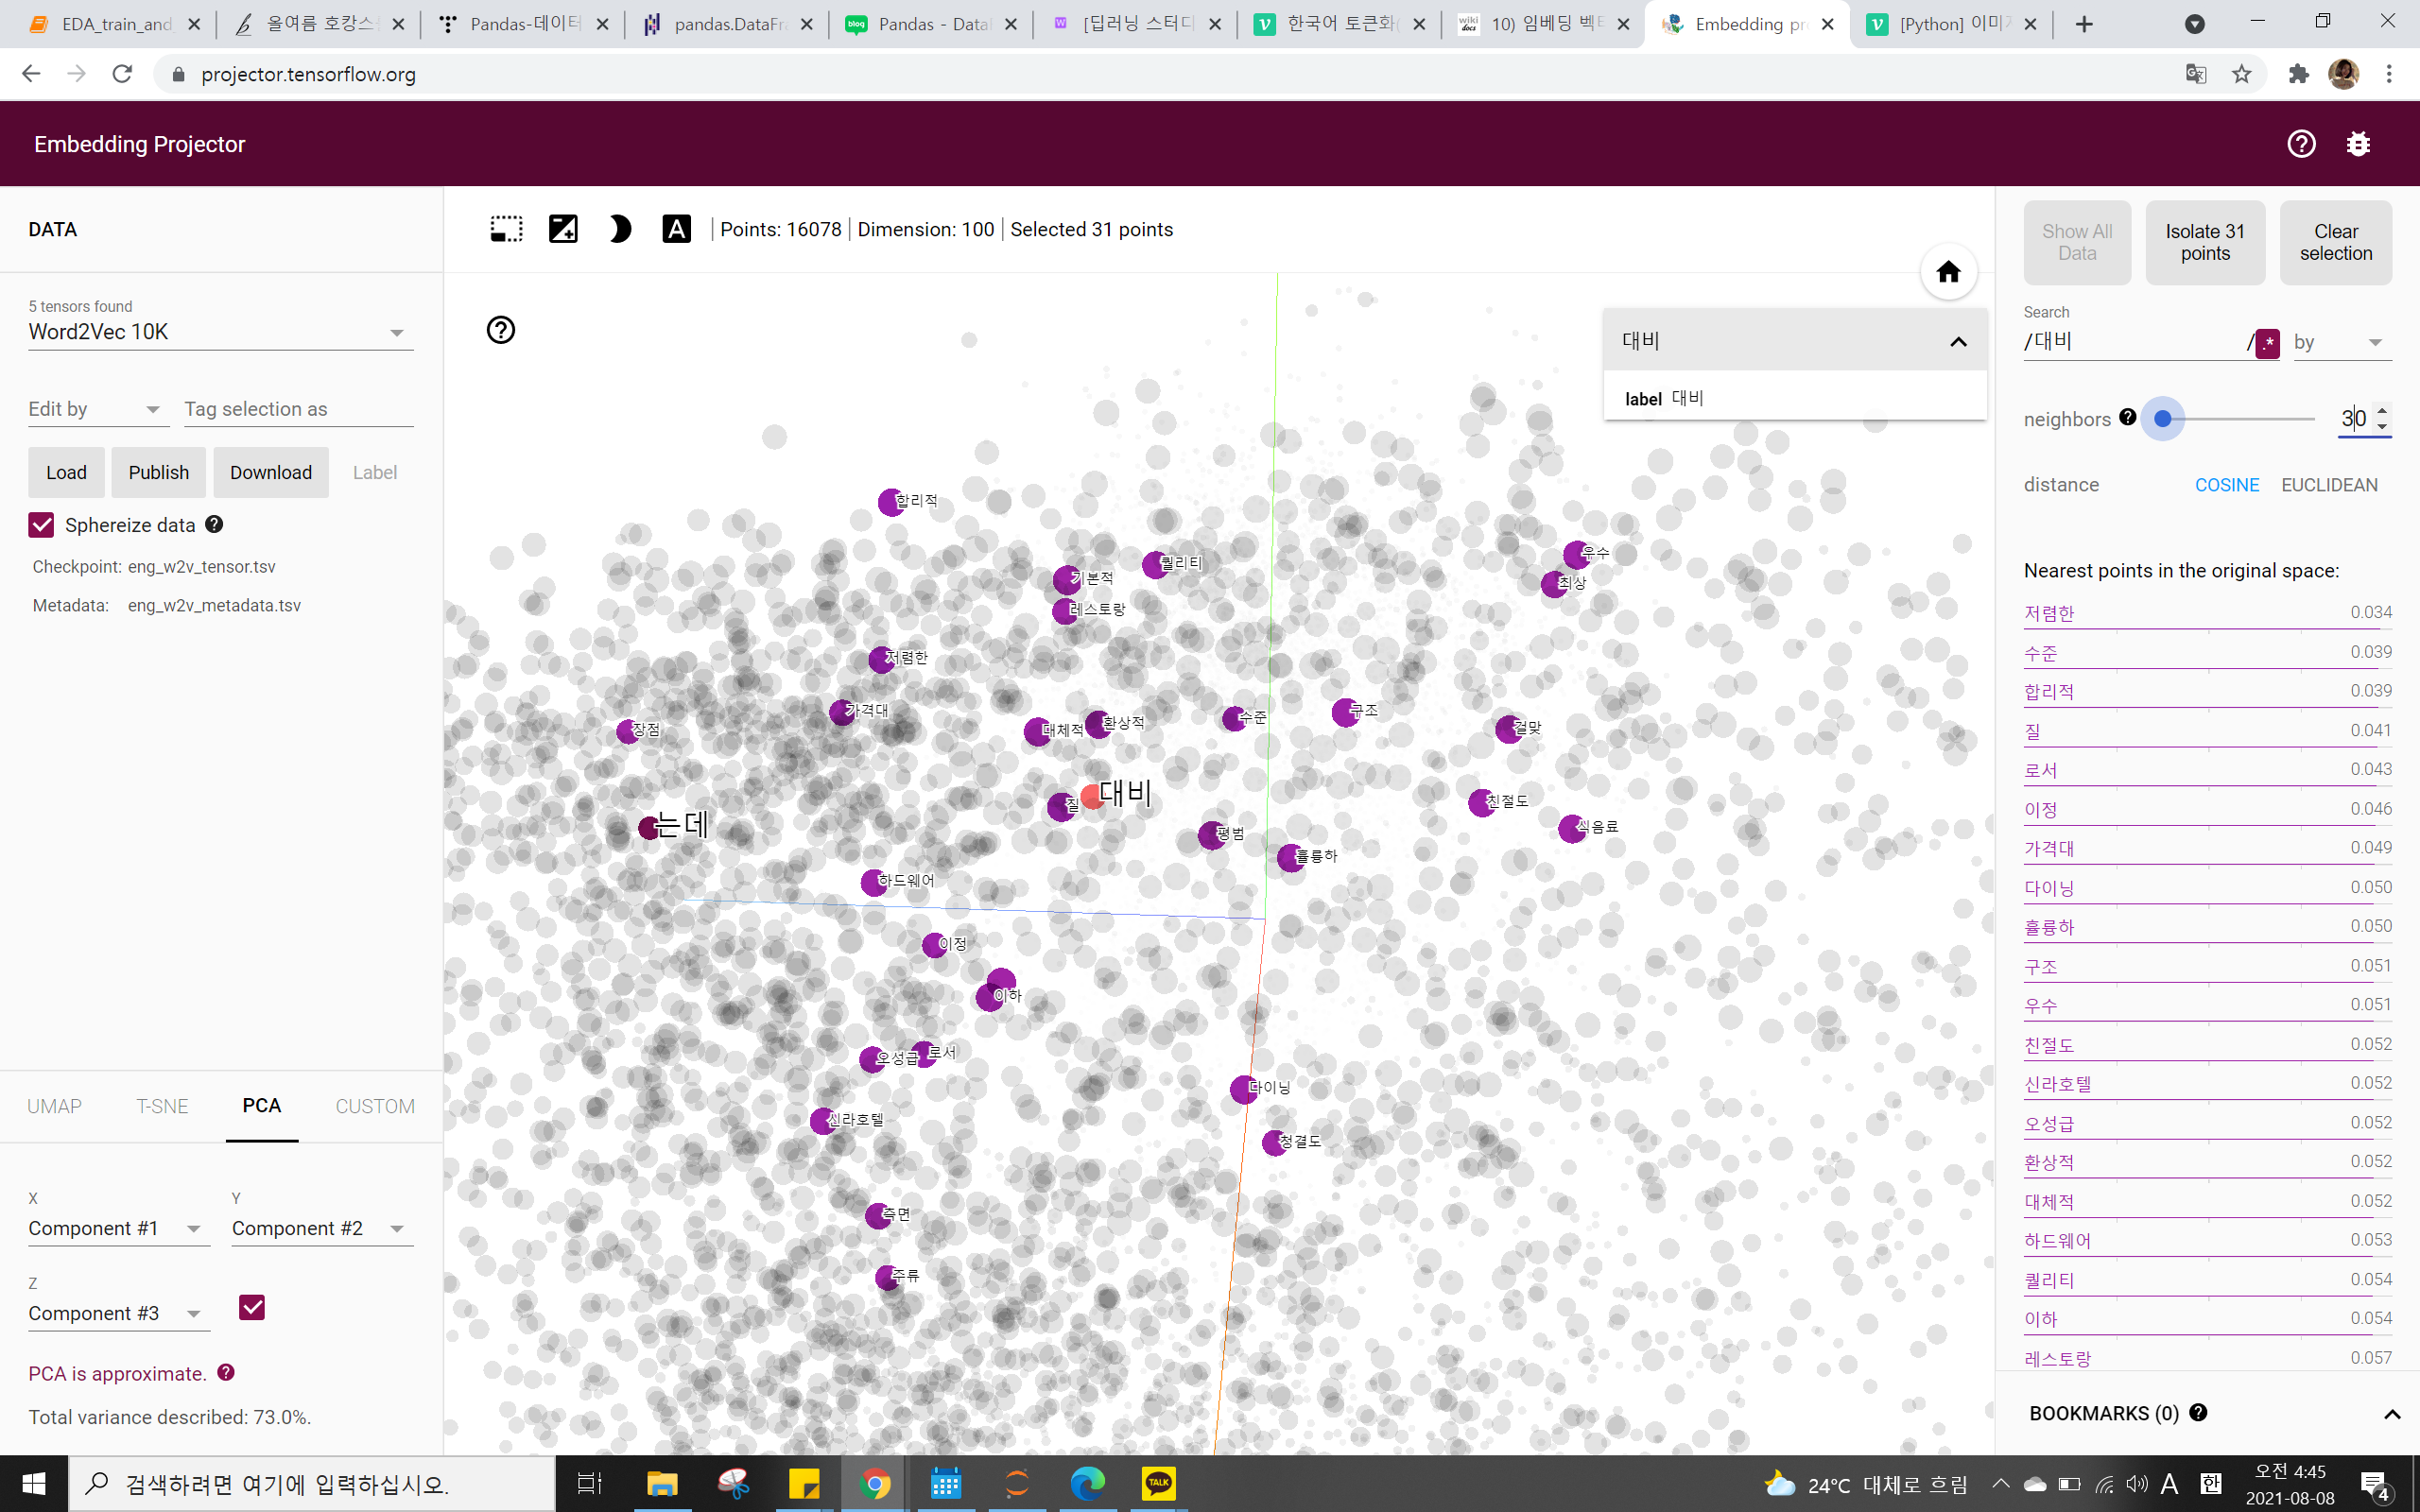

In [128]:
model_result = loaded_model.most_similar("대비")
print(model_result)
Image("./word_embeding/image/대비.png", width =800)


In [ ]:
# 임베딩이 과연 빈도분석보다 의미가 있는지는 모르겟음!! 너무 디테일함
# 물론 임베딩은 빈도분석 기반임. 

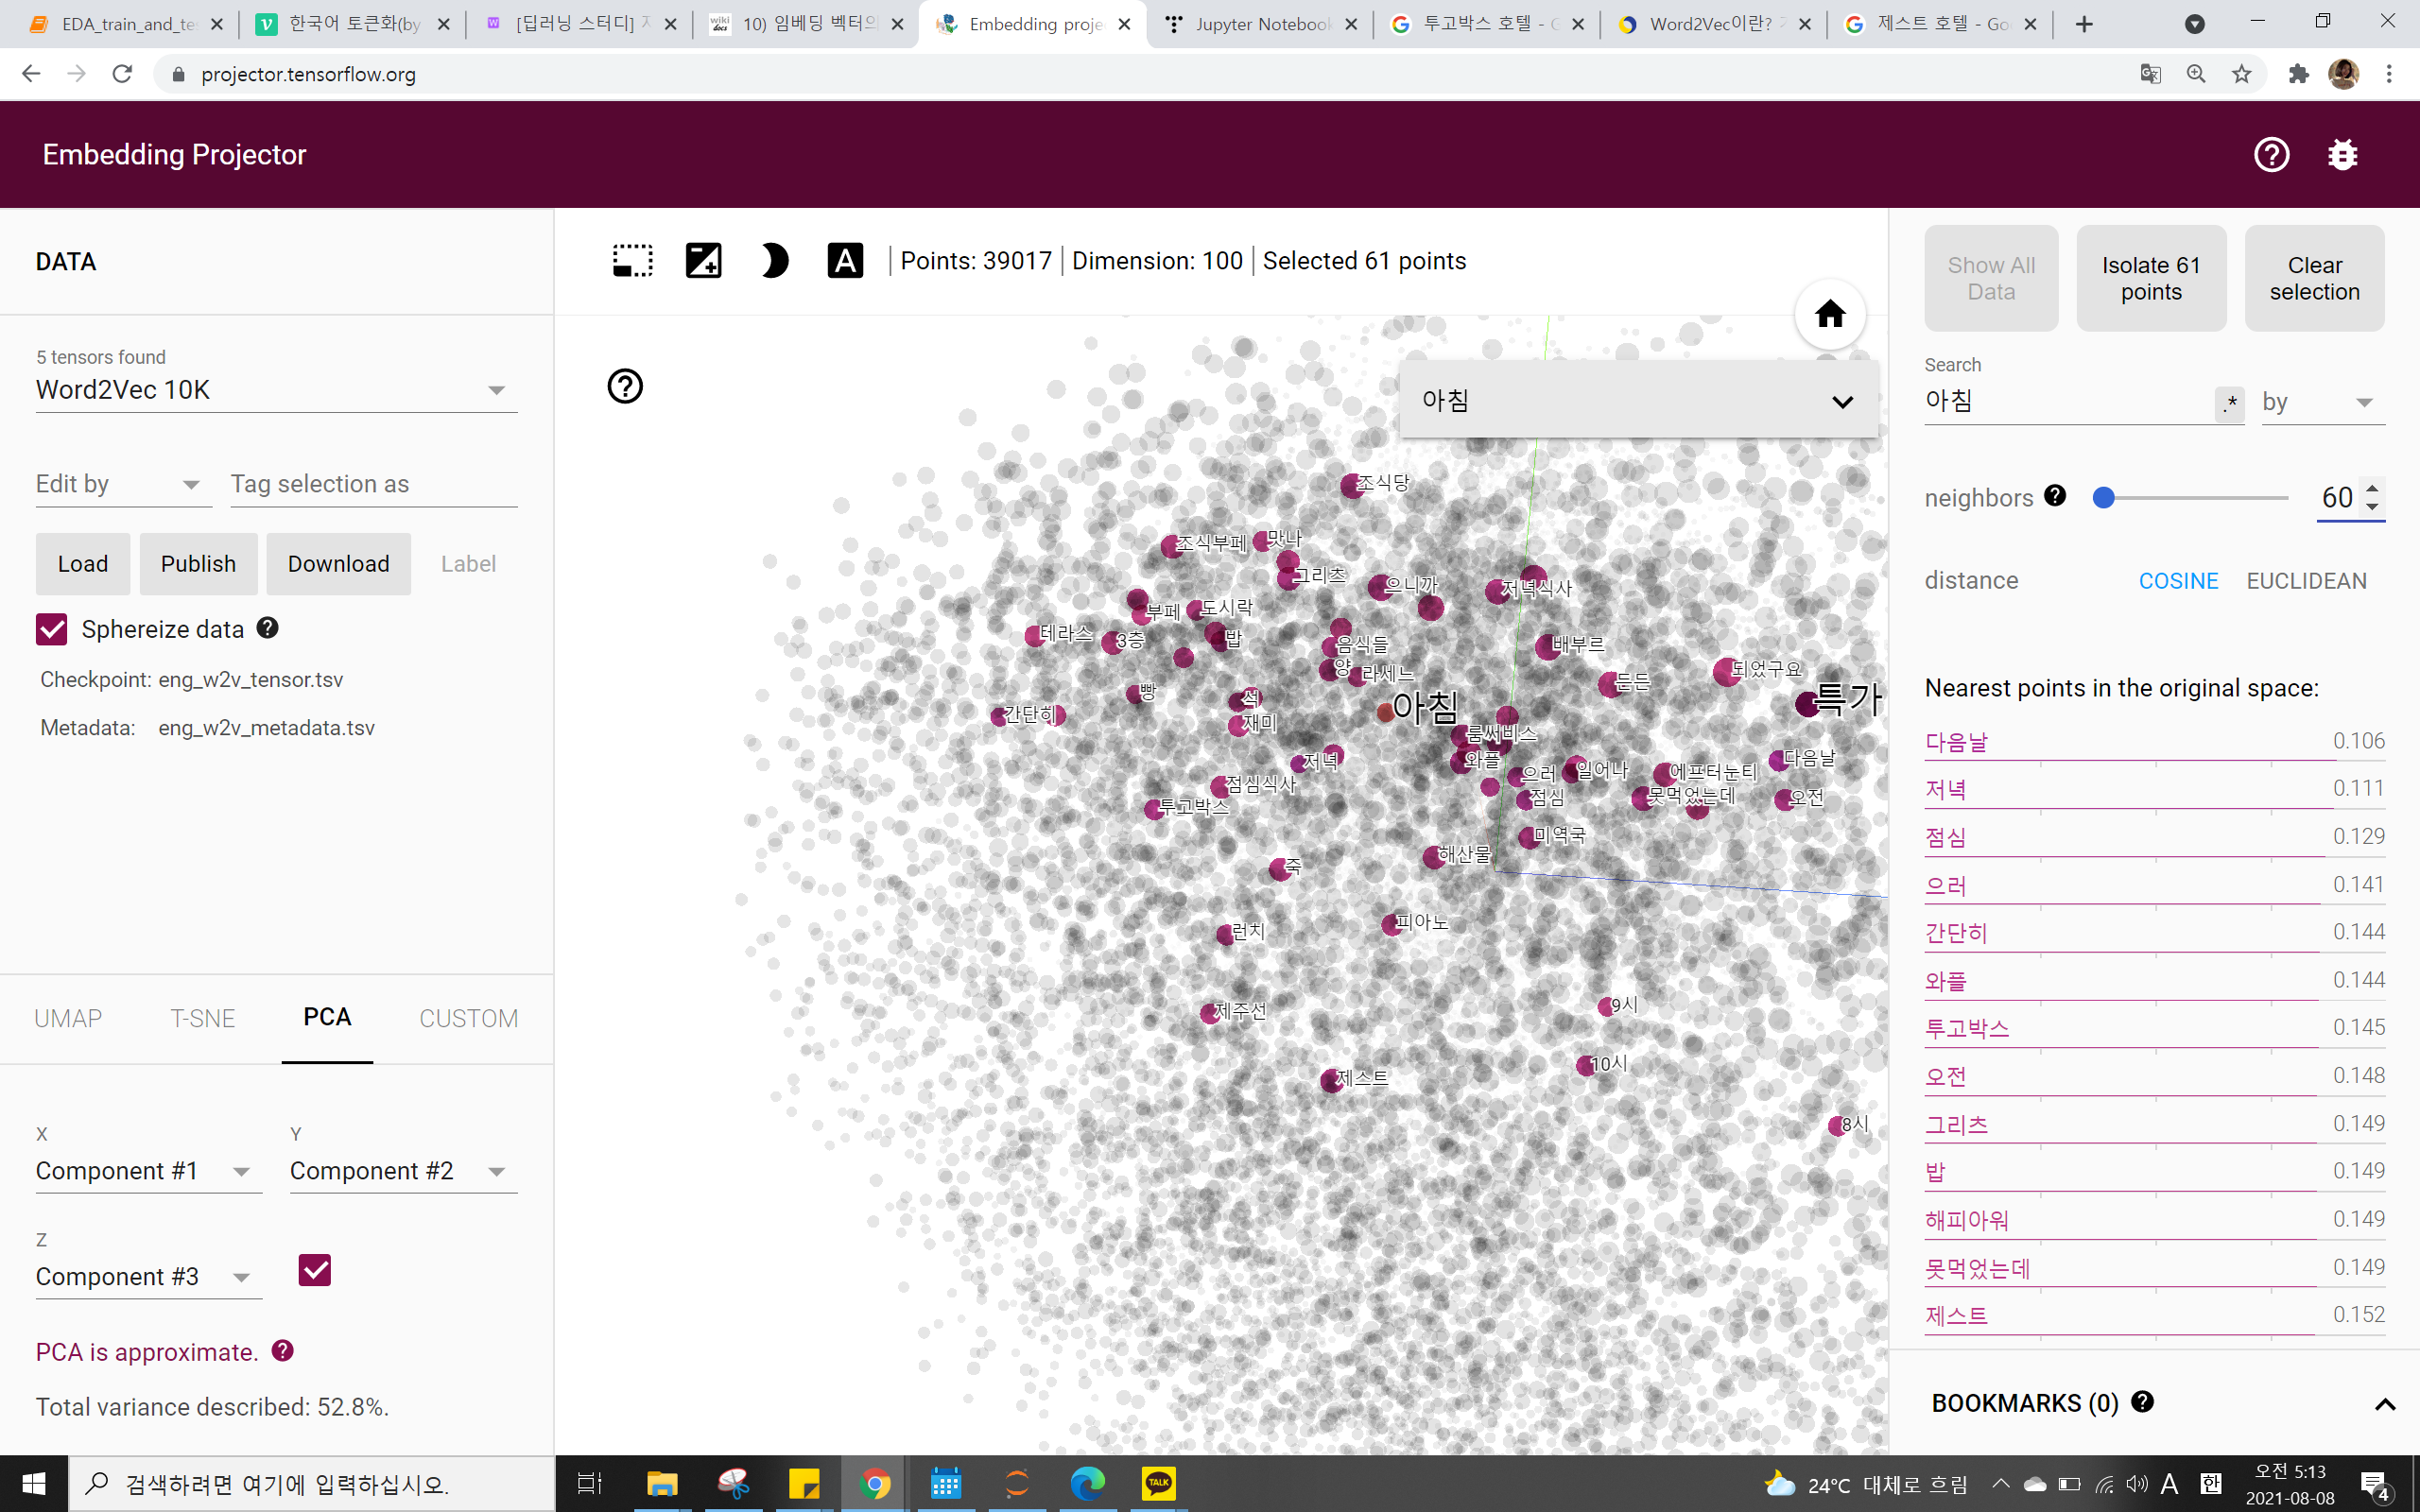

In [129]:
Image("./word_embeding/image/아침.png", width =800)
#model_result = loaded_model.most_similar("아침")
#print(model_result)

In [148]:
# 아침 423개 
sum=0
for text in df.review:
    if '아침' in text:

        print(np.where(df.review == text)[0][0], text,'\n')
        sum = sum +1 
print(sum)

51 서울 여의도에 위치해서 그런지 비지니스 호텔 느낌이었습니다 아침 조식은 너무 기대 이하였습니다 음식 종류도 적었고 맛도 그저 그랬습니다 그나마 직원들은 친절해서 좋았습니다 

62 서비스 최악 5성급 호텔이지만 한국 도심에 위치한 외국인 전용호텔 같음 투숙비용이 엄청난데 비해 모든 서비스에서 한국인 차별이 심함 특히 주중 아침 부페를 이용하면 한국인 차별이 심함 가족 호캉스용 호텔중 최악임 

71 서울의 중심에서 한강을 바라보며 깨끗한 객실에서 행복하게 쉴 수 있다는 것은 매우 즐거운 일이다 이런 즐거움을 누리고 간다 아침에 한강의 태양이 비치는 모습과 야경도 멋졌다 

80 뷰가좋다 아침 조식도 괜찮고 방이 정말 크다 비싼이유가있다 그래도 고급호텔이라그런지 넘 비싸긴해 돈많고 좋은하루를 보내고 싶다면 오세요 

85 생일을 맞아 콘래드 호텔에 투숙했습니다 골드 티어를 갖고 있어서 거의 만실이라 리버뷰만 업그레이드 받았습니다 아이들이 있어서 인디언 텐트를 요청했더니 여분이 남아있어서 방에 설치했습니다 아직 어린 둘째가 너무 좋아했습니다 체크인 시 곰인형을 요청했는데 이제는 유료라고 이야기했습니다 하지만 생일이었기 때문에 방문한 거라 예쁜 곰돌이를 선물로 받았습니다 무료일때보다 곰돌이가 더 예뻐졌습니다  주말이었지만 라운지에서 조용히 쉴 수 있어서 좋았습니다 마침 지구의 날 행사때문에 저녁에 특별 요가클래스가 있어서 참여했습니다 기본적인 스트레칭 위주였지만 오랜만에 힐링하는 기분이었습니다 조식은 사람이 너무 많아 제스트 쪽에서 떨어진 오른쪽 다른 레스토랑쪽으로 안내받았습니다 덕분에 독립적인 공간에서 아이들과 편하게 식사할 수 있었습니다 아침식사에 김치찌개와 제육볶음이 있어서 신기했습니다 체크아웃 후 라운지에서 쉬고 갈 수 있게 해주어서 가족들이 여유있는 시간을 즐기다 왔습니다 예전보다 많이 안 좋아졌다는 이야기를 듣고 각오하고 갔는데 잘 쉬다 왔습니다 

91 콘래드 서울에 1112월에 총 3번 방문하였고 3번의 경험 모두 만족스러웠습니다  방에서 보는 

3969 친구랑 방문했는데 위치도 역에서 가까워서 좋고 잠자리도 편안했습니다 아침에 조식이용하는데 빵도 종류가 여러개 있어서 선택하는데도 행복하고 계란요리랑 쌀국수 국물이 맛있어서 여러번 먹었습니다 다음에도 재방문 의사 있습니다  

3985 부산 살지만 여행 기분 내고 싶어 아침에 급 예약해서 왔어요 가성비 굿이란 리뷰 보고 왔는데 역시나 만족합니다 객실은 카펫 아니고 마룻바닥이라 깔끔하고 모던해서 좋았습니다 프리미어 디럭스 룸 예약했는데 간단한 스낵 두캔 맥주 두캔 음료 두캔이 있는 미니바가 무료였고 루프트탑 이용 가능했어요 루프트탑 수영장은 78월만 이용 가능했고 9월은 자쿠지와 건식사우나만 이용 가능했어요 자쿠지 너무 작아서 처음엔 좀 당황했지만 4살 7살 애기들은 따뜻한 물에 몸 담그고 잘 노네요  편하게 충전하고 갑니다 

4012 프리미어룸에 묵었습니다 해운대주위 호텔들이 오래되다보니 더더욱 비교돼서 룸 컨디션이 더욱 좋네요 아침에 일어나니 해운대 모래사장과 바다가 보이는 전망도 너무 좋아요 침대가 약간 작긴하지만 시설도 너무 세련됐고 어메니티도 고급지네요 

4071 가격대비 객실 상태는 훌륭합니다 아침식사 부페는 메뉴가 거의 고정되어 있으나 다양하게 구비되어 있습니다 다만 아쉬운 점은 피드백이 좀처럼 이루어지지 않습니다 비교적 잘 관리되고 있으나 워낙 자주 방문해서 이런 사항들이 거슬릴 수도 있다고 생각합니다 머리카락이 욕실바닥 책상 등에 있었던 적이 몇번 있었고 프론트데스크에 이야기해서 새로운 방으로 배정받은 적이 있었습니다만 머리카락을 발견한 세번째 경우부터는 고쳐지지 않는다는 것을 깨닫고 더 이상 프론트데스크에 전달하지 않고 그냥 방을 사용하고 있습니다 호텔 안내책자에 안내되어 있는 내용이 잘못되어 있어서호텔 내 ATM 배치에 관한 사항 수정할 것을 고객 메모로 남겨놓았지만 1년넘도록 고쳐지지 않고 있습니다 객실 샤워헤드의 코팅이 손상되어 손이 긁히는 일이 있었고 다른 손님들 특히 유아들이 다칠 것이 염려되어 프론트 데스크에 말씀드리고 직

6950 공항에서 가깝고 근처에 이마트도 있고 넘 좋은데 방파제 따라 산책할 곳도 있어요 공항이 가깝다보니 바다뷰에 비행기소음이 좀 있어요 방음이 잘되어 문을 닫으면 괜찮아요 6월이라 창을 열었더니 꽤 소리가 아침조식 뷔페는 음식도 다양하고 맛있어요 

6963 동대문 번화가에 그런 휴식같은곳이 있을줄이야 친정식구들과 모처럼 휴가를같이보내면서 호캉스하려고 찾아보다가 찾아가게된 그곳 아이들과 부모님까지 모두를 생각해야하기 때문에 강원도펜션이나가야하나했는데 이많은 식구들과 호캉스라니 주차장에서부터 체크인하는 라운지까지 들어서자마자 대접받는기분이었고 vip라운지에서의 체크인과 아이들은 객실에들어서자마자 환호성을 지르기 시작했고뭐라고소리를 지르나 싶었더니   지니야지니야 부르면 최신식 시스템을 아이들이 먼저 알아보고 음악을틀고 조명을 켜고 에어컨도조절하며 각종서비스를 음성서비스로만 이용하고있었죠 어른들은 EFL라운지를이용하며 와인과 다양한술을 맛보며 분위기를냈고 이곳에서는 간단하게 저녁을해결할수있는부분도 충족이 되는거 같아서 많은 분들이 이용하는듯했다커피를마시며 간단한 업무를 보기에도 너무쾌적한분위기여서 우리집 서재가 이랬으면 하는 생각까지이시각 우리 아이들은 바로 수영장으로 고고씽 사람이 많아서 놀랬다그만큼 이곳을 알고 온사람들이 많다는 수영복차림을내려가서 수영장을이용하고 간단한샤워까지하고 객실로다시올수있었고 그리고또 놀라운 점은 첨엔몰랐는데 우리가 이용한 객실두개가 연결이되는 커넥팅 2객실이라는거 아이들과함께간우리로선 최고의 조건이아닌가 싶었다 이곳은 모든게 우리가족에게 맞춰줬다는게 느껴졌다 저녁엔 베트남음식특집으로 뷔페에서 베트남쉐프의 요리를맛볼수있었다워낙 베트남음식좋아하는 우리아이들은 먹고먹고또먹고 음식이 정결하고 실속있게 구성되어있는 여러음식들이 다먹지 못해 계속 아쉽기만했다  그리고 마지막 하이라이트는 루프탑 아이들이 못봐서 많이아쉬워했지만 여러조명으로 서울도심 한가운데를 아름답게 장식해주는 루프탑수영장 너무늦은 밤이라 수영장을이용하진못했지만 낼아침 일찍 

9855 도심 속에 조용함과 편안함을 제공합니다 깔끔한 느낌 전체적으로 모던합니다 주변 조계사가 있어 이른 고요한 아침 산책 좋습니다 

9863 시설도 깨끗하고 아침도 너무 맛있어서 호캉스제대로 즐기다가 갑니다 나중에 꼭 다시한번 들려서 점심도 먹어볼개요 감사합니다 

9907 패밀리룸으로 업그레이드 해주셨는데 깨끗하고 넓고 좋아요 특히 욕실이 넓고 깨끗하네요 위치도 광화문역이랑 경복궁 가까이라서 아침에 산책하기 좋아요 위치도 시설도 굿 

10001 아침에 인근에 가려고 여기저기 알아보다가 가장 깨끗하고 저렴한 곳으로 골랐습니다 혼자서 보내기 딱 좋다고 하셨습니다 

10004 날씨가 맑은날에 아침에 커텐을 걷으면 서울 시내 풍경을 볼수도 있고 올때마다 아늑하게 쉬고 다음날 비즈니스에 지장이 없게 좋은 위치에 있습니다 

10063 아침에 사진을 찍어서 사진 상태는 좀 안 좋지만  그래도 되게 프론트부터 친절하게 안내해주시고 설명해주셔서 좋았어요 프론트에서 FD정승태 씨께서 되게 친절하고 자세하게 설명해주셔서 더 즐겁게 입실했던 것 같아요 게다가 아침 조식까지 먹었는데 조식 상태도 좋았습니다  100일 기념해서 남자친구가 잡았는데 코로나 사회적 거리두기로 인해 수영장이나 사우나는 체험 못 한 대신 안내나 서비스가 좋아서 충분히 만족하고 갔네요  

10085 코로나 때문에 친구들과 해외여행이 무산되서 아쉬운 마음에 여행 기분을 내보자는 생각에 1박하게 되었는데 여행기분만이 정말 제대로 여행 다녀온것 같네요 로비 입구에서부터 철저히 체온 체크해주시고 청결과 방역에 많은 신경을 쓰고 있는게 느껴지니 우리집보다 더깨끗할것 같은 느낌에더욱 안심하면서 지낼 수 있었어요 먼저 르살롱 라운지에서의 멋진 저녁과 조식은 음식 하나하나에 흠잡을게 없었고 저녁 해피아워에는 다양한 칵테일과 와인을 맛볼수 있어서 르살롱의 고급스러운 공간에서 정말 분위기 내면서 시간을 보낼 수 있었어요 그중에서 파스타와 스테이크 넘맛있었구요 과일 하나하나까지도 달고 맛있었어요 조식도 죽부터 다양한

[('점심', 0.8666318655014038), ('아침', 0.8570270538330078), ('라세느', 0.8358076214790344), ('간단히', 0.8340808749198914), ('2층', 0.8337469696998596), ('밥', 0.8311266303062439), ('해온', 0.8296487927436829), ('저녁식사', 0.8267101049423218), ('저녁시간', 0.8245840072631836), ('다음날', 0.8186116814613342)]


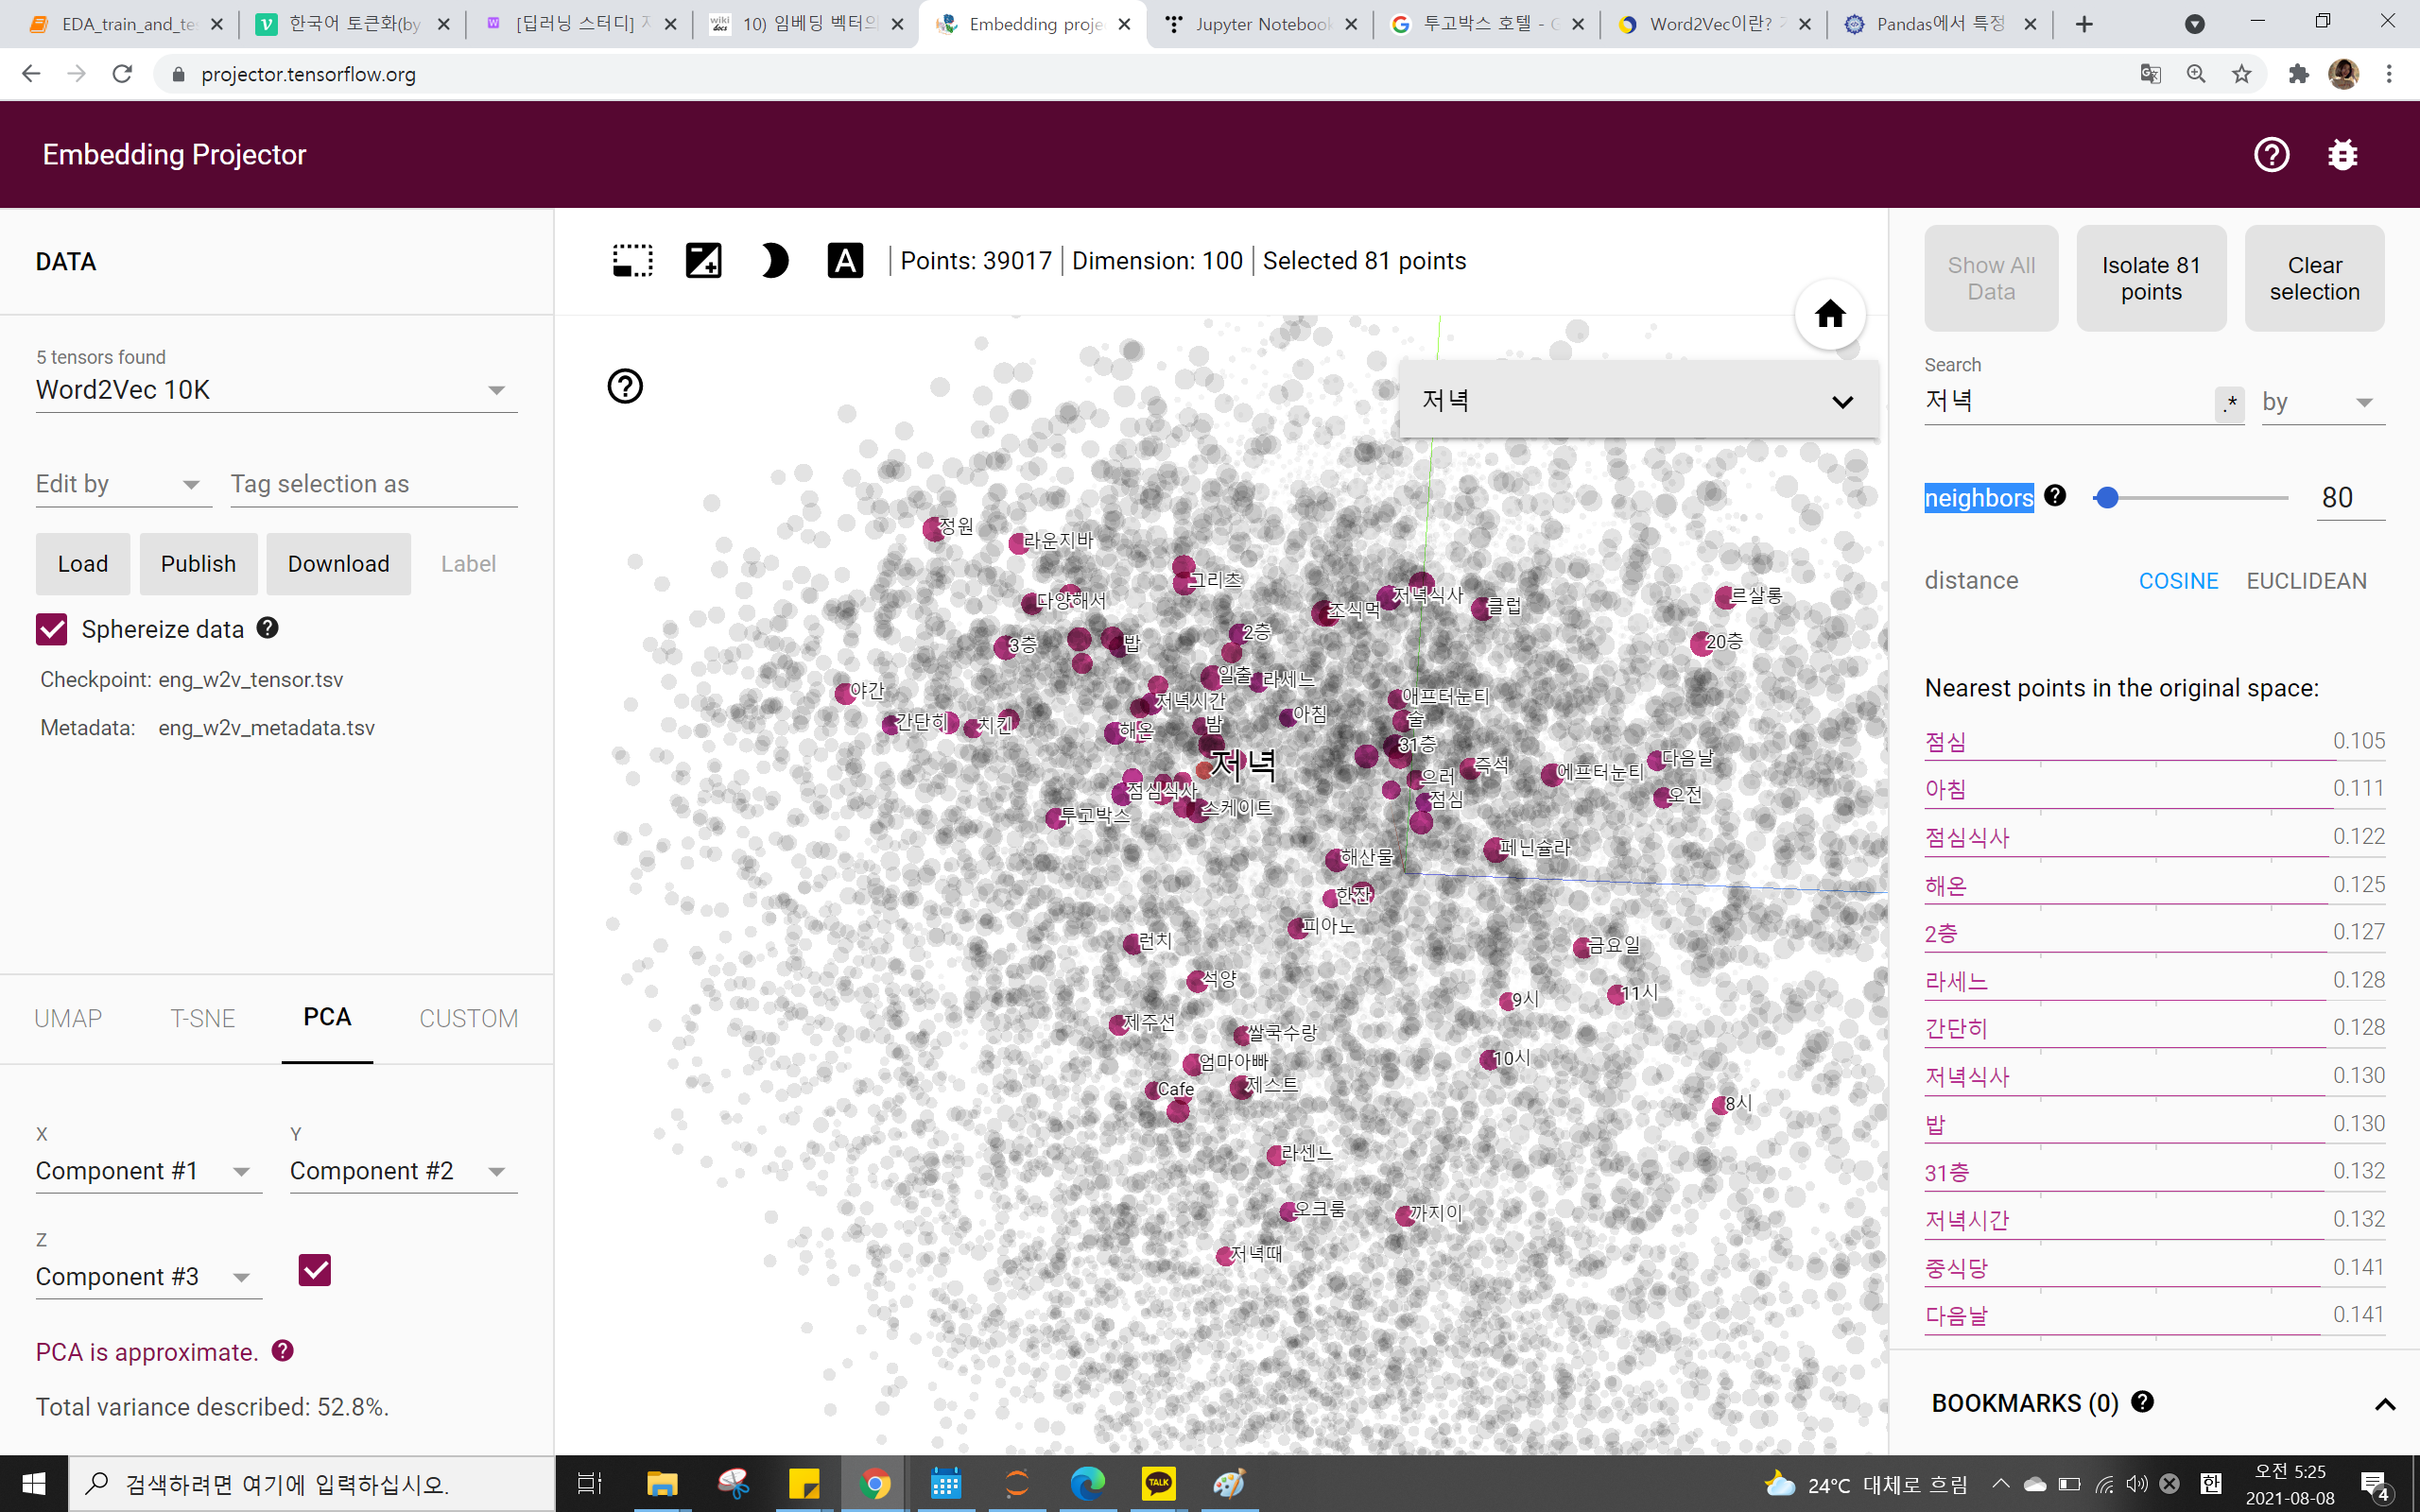

In [141]:
model_result = loaded_model.most_similar("저녁")
print(model_result)
Image("./word_embeding/image/저녁.png", width =800)


In [145]:
# 두개 단어 공통집합
# 리뷰 인덱스 까지 추출

# 저녁 관련성 깊은것 -> 저녁식사!! 인줄 알앗는데 
# 다른 중요한 키워드 있을것 같음 
sum = 0 
for text in df.review:
    if '저녁' in text:
        if '식사' in text:
            print(np.where(df.review == text)[0][0], text,'\n')
            sum = sum +1 
print(sum)

11 항상 지리적으로 만족하는 호텔 더현대서울이 생기고 처음 가봤지만 평일이라 그런지 그렇게 복잡하진 않았네요 체크인도 대기없었고 항상 친절한 직원분들 다만 저녁식사를 한 37층은 손님이 많아서인지 직원분들 너무 정신이 없으신지 몇가지 부탁들을 드려도 서루 미루는 모습과 잊으신 모습들 아쉽습니다 

85 생일을 맞아 콘래드 호텔에 투숙했습니다 골드 티어를 갖고 있어서 거의 만실이라 리버뷰만 업그레이드 받았습니다 아이들이 있어서 인디언 텐트를 요청했더니 여분이 남아있어서 방에 설치했습니다 아직 어린 둘째가 너무 좋아했습니다 체크인 시 곰인형을 요청했는데 이제는 유료라고 이야기했습니다 하지만 생일이었기 때문에 방문한 거라 예쁜 곰돌이를 선물로 받았습니다 무료일때보다 곰돌이가 더 예뻐졌습니다  주말이었지만 라운지에서 조용히 쉴 수 있어서 좋았습니다 마침 지구의 날 행사때문에 저녁에 특별 요가클래스가 있어서 참여했습니다 기본적인 스트레칭 위주였지만 오랜만에 힐링하는 기분이었습니다 조식은 사람이 너무 많아 제스트 쪽에서 떨어진 오른쪽 다른 레스토랑쪽으로 안내받았습니다 덕분에 독립적인 공간에서 아이들과 편하게 식사할 수 있었습니다 아침식사에 김치찌개와 제육볶음이 있어서 신기했습니다 체크아웃 후 라운지에서 쉬고 갈 수 있게 해주어서 가족들이 여유있는 시간을 즐기다 왔습니다 예전보다 많이 안 좋아졌다는 이야기를 듣고 각오하고 갔는데 잘 쉬다 왔습니다 

170 자녀에게 궁을 처음 보여주는 시간을 가지러 포시즌 서울 호텔에 투숙하였습니다체크인 후 인근 경복궁에 가서 궁을 경험하고 피곤한체 객실로 돌아와 낮잠 후 명절기간이라 식당들이 오픈하지 않았고 저녁식사하러 나가기 귀찮아 포시즌 어플리케이션으로 룸서비스를 주문하였습니다 주문 후 도착예상시간이라는 표기가 있어 의아해 했으나 오차없이 정확한 시간에 객실로 음식 도착해서 너무 놀랐습니다 또 다음날 오전에도 같은 감동이 이어질까하며 조식을 주문하였는데 역시나 오차없이 도착하여 놀라고 내부 직원교육과 시스템이 안정적이구나 생각했습니

In [146]:
sum=0
for text in df.review:
    if '저녁' in text:
        if '클럽' in text:
            print(np.where(df.review == text)[0][0], text,'\n')
            sum = sum +1 
print(sum)

162 모든 면에서 잘 운영되고 있는 럭셔리 호텔의 교과서와 같은 호텔이었습니다  객실은 잘 관리되어 투숙 기간 내내 쾌적함을 느낄 수 있었습니다 침대는 무척 편안했고 조명과 인테리어가 매우 세심하게 만들어졌음을 느낄 수 있었습니다  유유안 중식당에서 먹은 딤섬 런치 마켓 키친에서 먹은 조식 모두 매우 만족스러웠습니다 다만 클럽 라운지의 음식은 평범한 편이었습니다  수영장과 헬스장의 시설과 관리 상태 매우 좋았습니다  직원들은 항상 친절하게 응대해주었고 특히 아이에게 항상 웃어주셔서 감사했습니다 투숙일 저녁에 프런트의 한 직원 분이 제 얼굴만 보고 아이 이름을 기억하고 안부를 물어주셔서 무척이나 놀랐습니다  다만 제가 예약한 서비스가 가능 시 룸 업그레이드 조건이었고 당일 객실 점유율이 매우 낮았음에도 업그레이드를 받지 못한 점은 조금 아쉬웠습니다  가족 친구들 커플 비지니스고객 누구라도 만족할만한 국내 최고의 호텔입니다 

329 개인적으로 서울에 위치한 호텔들 중 뷰가 최고라고 생각해요 시그니엘은 너무 높아서 숙박하기엔 살짝 꺼려져서 여기로 선택했는데 대만족입니당 저녁은 그랜드클럽 이용하고 아침은 조식 뷔페 이용했는데 둘다 너무 좋았어요 수영장도 당연히 최고구요추천합니당 

563 가족과 함께 그랜드 스윗룸을 예약하고 연휴 당일 방문했어요 연휴라 사람이 많았는데 스윗룸 예약자는 클럽 라운지에서 따로 체크인을 도와 주셔서 대기 시간이 지루하지 않았답니다 대기하는 동안도 간단한 다과를 먹을 수 있고저는 민트차를 마셨는데 잎차가 참 좋았어요 저녁도 같은 곳에서 먹었는데 분위기가 참 즐겁고 음식도 깔끔하고 다양해서 기대이상이었답니다 객실은 1260호실 야경이 정말 멋져서 가족이 모두 침대에 앉아서 담소를 나누며 한참 바라봤어요  근처에 바로 남산공원둘레길이 있어서 아침에 운동겸 조깅하기도 좋고 사우나 수영장 헬쓰클럽 시설들을 모두 사용할 수 있어서 연휴를 호텔에서 보낼 떄는 꼭 추천하고 싶은 장소예요  

590 아이와는 특히 클럽으로는 예약하지 마세요 제한이 많

In [ ]:
# 저녁 포함 리뷰 440개  
sum=0
for text in df.review:
    if '저녁' in text:

        print(np.where(df.review == text)[0][0], text,'\n')
        sum = sum +1 
print(sum)

In [150]:
sum = 0
with open('review_train_and_test.txt','r',encoding='utf-8')as file:
    for line in file:
        words=line.split()   #공백을 기준으로 분리해 리스트로
        for word in words:
            if '저녁' in word:  #읽어 온 단어 중 'c'포함되면 출력
                print(np.array(word.strip(',.')))
                sum = sum +1
print(sum)

저녁
저녁식사를
저녁에
저녁에
저녁식사하러
저녁
저녁
저녁식사는
저녁식사를
저녁식사하러
저녁은
저녁
저녁이되니까
저녁식사
저녁식사를
저녁시간에
저녁에
저녁이었다캐비어에
저녁에
저녁으로
저녁을
저녁
저녁식사를
저녁에
저녁엔
저녁도
저녁에
저녁시간은
저녁을
저녁
저녁때
저녁먹으러
저녁으로는
저녁시간에
저녁
저녁
저녁비행기라
저녁먹고
토요일저녁
저녁에
저녁에는
저녁에
저녁에
저녁에
저녁
저녁엔
저녁에는
저녁땐
저녁
저녁식사
저녁에
저녁먹고
저녁식사을
저녁시간에
저녁으로
저녁식사도
저녁전망도
저녁이
저녁이지만
저녁에
저녁
저녁은
저녁을
저녁먹고
저녁에는
저녁식사를망쳐서
저녁에
저녁이든
저녁시간대는
저녁되니
저녁에
저녁에는
아침저녁으로
저녁에
저녁마다
저녁을
저녁9시경에
저녁
저녁에
저녁에도
저녁
저녁에
저녁9시늦게
저녁에
저녁에
저녁에
저녁
저녁식사
저녁
저녁
저녁식사도
저녁에는
저녁까지
저녁에
저녁엔
저녁엔
저녁을
늦은저녁
저녁
저녁
저녁에
저녁에
저녁에
저녁도
저녁
저녁시간에
저녁
저녁시간을
저녁먹었는데
저녁에
저녁쯤
저녁시간에
저녁에
저녁
있었고저녁에
저녁에
저녁이라도
저녁
저녁
저녁시간에
저녁은
저녁식사도
저녁식사를
저녁을
저녁을
저녁에
저녁
저녁에
저녁에
저녁시간에
저녁시간에
저녁
저녁아침
저녁
저녁에
저녁
저녁에
저녁을
저녁엔
저녁식사를
저녁
저녁엔
저녁에
저녁
저녁에
저녁을
저녁에
저녁에
저녁에
저녁
저녁
저녁서비스
저녁까지
저녁식사와
저녁이되니
저녁에
저녁을
저녁을
저녁에는
저녁에
저녁
저녁
저녁에
저녁
놀다갘저녁에
저녁
저녁시간을
저녁에
저녁부페가
저녁
저녁을
저녁엔
저녁에
저녁에
저녁에
저녁에
저녁에
저녁
들었네요저녁이
저녁에
저녁을
저녁을
저녁에
저녁에
저녁
저녁에는
저녁을
저녁도
이용했다저녁식사를
이용했다저녁식사를
저녁
저녁에
저녁
저녁시간에는
저녁의
저녁에
저녁도
저녁이랑
저녁먹다
저녁에
저녁에는
저녁
저녁에
저녁에는
저녁에
저녁
저녁
저녁하고
저녁에는
저녁에
저녁엔
저녁에
저녁은
저녁에도
저녁뷔페를
저녁에는
저녁에
저녁뷔페도
저녁에는
저녁에


##  특정 토픽 포함된 토큰 리뷰 찾기 

In [188]:
# 토픽 0: 침대 욕조 모두 포함된 리뷰 
sum=0
for i in df['number']:
    if '침대' in df.review_token[i]:
        if '욕조'  in df.review_token[i]:
            print(i, df.review[i], '\n')
            sum = sum +1
print(sum)

13 객실 종류 City View Room  지하철에서 좀 거리가 있긴 하지만 위치는 여의도에서 더 좋을 수가 없다 IFC몰에 지하로 바로 연결되어 있고 길건너에 최근에 문을 연 현대 백화점이 있다 다만 IFC 오피스 빌딩이 너무 가까워서 창문에서 건너편 사무실이 잘 보이는 편이다 그쪽에서도 호텔 객실이 잘 보이지 않을까 그런데도 욕실에 객실 창쪽으로 창을 뚫어뒀다 블라인드나 커튼도 없이 그 축에 화장실도 있다 화장실  욕조  욕실 유리창  방 유리창  건너편 사무실 유리창이 일직선으로 연결된다 화장실에 다행히 불투명처리된 유리문이 있긴한데 객실 블라인드를 내리지 않으면 건너편 사무실에서 객실창과 욕실창을 통해서 내가 화장실에 들어가는 모습과 문을 닫아도 볼일을 보는 모습이 문에 비치지 않을까하는 불안감이 든다 욕실창 아니더라도 호텔이 맞은 편 사무실들에 불안감을 느낄 정도로 너무 가까워 커튼이나 블라인드를 치지 않을 수가 없다  건물 설계를 할때 호텔 목적이 분명했다면 IFC 오피스 빌딩들과 같이 설계되었을테고 그럼 서로 가까이서 마주보게 된다는 걸 분명히 알았을 것이고 그러면 객실 창을 여의도 공원쪽을 향하게 톱니 모양으로 만들었어야 했을텐데 객실에 프라이버시에 대한 고려가 건물 설계단계에서부터 부족했고 그런 부주의함이 객실 인테리어에까지 이어진 것 같다  로비는 서울에 있는 호텔들중에서도 최고에 속하는 웅장함을 선사한다 다만 거기에 힘을 너무 썼는지 객실 인테리어에는 무늬목을 너무 과도하게 사용한 느낌이다 무늬목의 감촉도 좋지 않고 호텔이 문을 연지 10년이 되어가는 것 같은데 아직도 가까이 가면 냄새가 별로인 부분도 있다  럭셔리 호텔은 모든 면에서 일상에서의 경험을 넘어서는 고급스러움을 투숙객들에게 선사해야할 의무가 있다고 본다 이 측면에서 콘래드 서울은 고급스럽지 않은 무늬목의 과도한 사용과 프라이버시에 대한 부주의함으로 그 의무를 다하지 못했다  좋은 점  방과 욕실이 넓다  IFC에 바로 연결 지하철역이 멀긴한데 지하로 오갈 수 있다  TV는 매

In [169]:
# 토픽 0: 침대 or 욕조 포함된 리뷰 
sum=0
for i in df['number']:
    if '침대' in df.review_token[i]:
        if '욕조'  in df.review_token[i]:
            print(i, df.review[i], '\n')
            sum = sum +1
print(sum)

1

## 토픽0의 특정 단어가 포함된  리뷰 개수  

In [320]:
sum_1 = 0;sum_2 = 0;sum_3=0;sum_4=0;sum_5=0
topic0_1 = [];topic0_2 = [];topic0_3 = []; topic0_4 = []; topic0_5 = [] # 인덱스 리스트 

for i in df['number']:
    if '침구' in df.review_token[i]:
            #print(i, df.review[i], '\n')
            sum_1= sum_1 + 1
            topic0_1.append(i)
            
    if '상태' in df.review_token[i]:
            #print(i, df.review[i], '\n')
            sum_2 = sum_2 + 1
            topic0_2.append(i)
            
    if '응대' in df.review_token[i]:
            #print(i, df.review[i], '\n')
            sum_3 = sum_3 + 1
            topic0_3.append(i)            

    if '프론트' in df.review_token[i]:
            #print(i, df.review[i], '\n')
            sum_4 = sum_4 + 1
            topic0_4.append(i)     

    if '분위기' in df.review_token[i]:
            #print(i, df.review[i], '\n')
            sum_5 = sum_5 + 1
            topic0_5.append(i)     


# 각 토픽이 들어간 리뷰 개수 
print(sum_1)
print(sum_2)
print(sum_3)
print(sum_4)
print(sum_5)

655
360
677
627
519


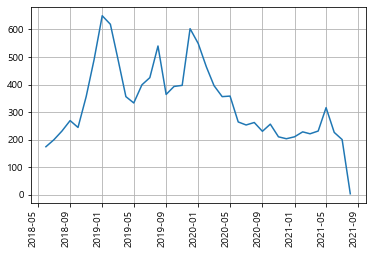

In [321]:
# 월별 전체 리뷰 개수 시각화 

stay_date_group = df.groupby(['stay_date'])
stay_date_group['review'].count()

import matplotlib.pyplot as plt
fig,ax = plt.subplots()
plt.plot(stay_date_group['review'].count())
fig.autofmt_xdate(rotation=90)
plt.grid(True)

# 코로나 발생 이후 리뷰 개수 줄어듦 


## [파이썬 matplotlib] 한 화면에 여러 그래프 겹쳐 그리기

numpy와 matplotlib 패키지를 불러옵니다. 



import numpy as np

import matplotlib.pyplot as plt



linspace 함수를 이용하여 0부터 4파이 사이를 200개로 나눈 X값을 생성합니다. 



X = np.linspace(0, 4 * np.pi, 200)



Y값은 사인함수 하나와 코사인함수 하나를 적용하여 두개 생성합니다. 



Y1 = np.sin(X)

Y2 = np.cos(X)



그래프를 그립니다. plt.plot 를 두번 사용해줍니다.



plt.plot(X, Y1)

plt.plot(X, Y2)



plt.show()

In [ ]:

import numpy as np
import matplotlib.pyplot as plt



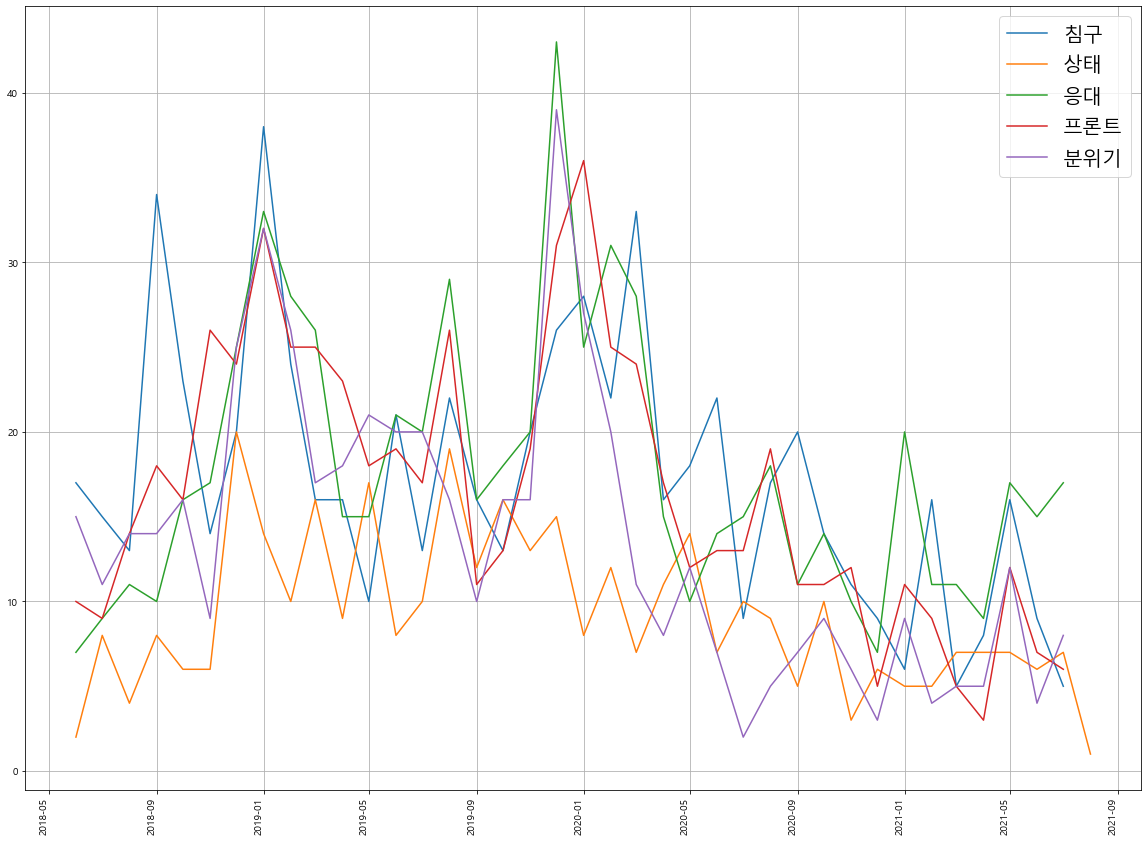

In [322]:
fig,ax = plt.subplots(figsize=(20,16))
plt.plot(df.iloc[topic0_1,:].groupby(['stay_date'])['review'].count(),label= '침구')
plt.plot(df.iloc[topic0_2,:].groupby(['stay_date'])['review'].count(),label= '상태')
plt.plot(df.iloc[topic0_3,:].groupby(['stay_date'])['review'].count(),label= '응대')
plt.plot(df.iloc[topic0_4,:].groupby(['stay_date'])['review'].count(),label= '프론트')
plt.plot(df.iloc[topic0_5,:].groupby(['stay_date'])['review'].count(),label= '분위기')

plt.legend(fontsize =20)
fig.autofmt_xdate(rotation=90)
plt.grid(True)

# 응대와 업그레이드 빈도 개수 관련있고 
# 침대 침구 상태 빈도 개수 관련 잇다. 


[('구조도', 0.9669568538665771), ('보송', 0.9646826982498169), ('맘에들고', 0.9550841450691223), ('방상태', 0.9550272822380066), ('방컨디션', 0.9514237642288208), ('친절하구요', 0.9513532519340515), ('위생상태', 0.9506440162658691), ('폭신폭신', 0.9504915475845337), ('깔끔하구요', 0.9491789937019348), ('폭신하', 0.9480375051498413)]


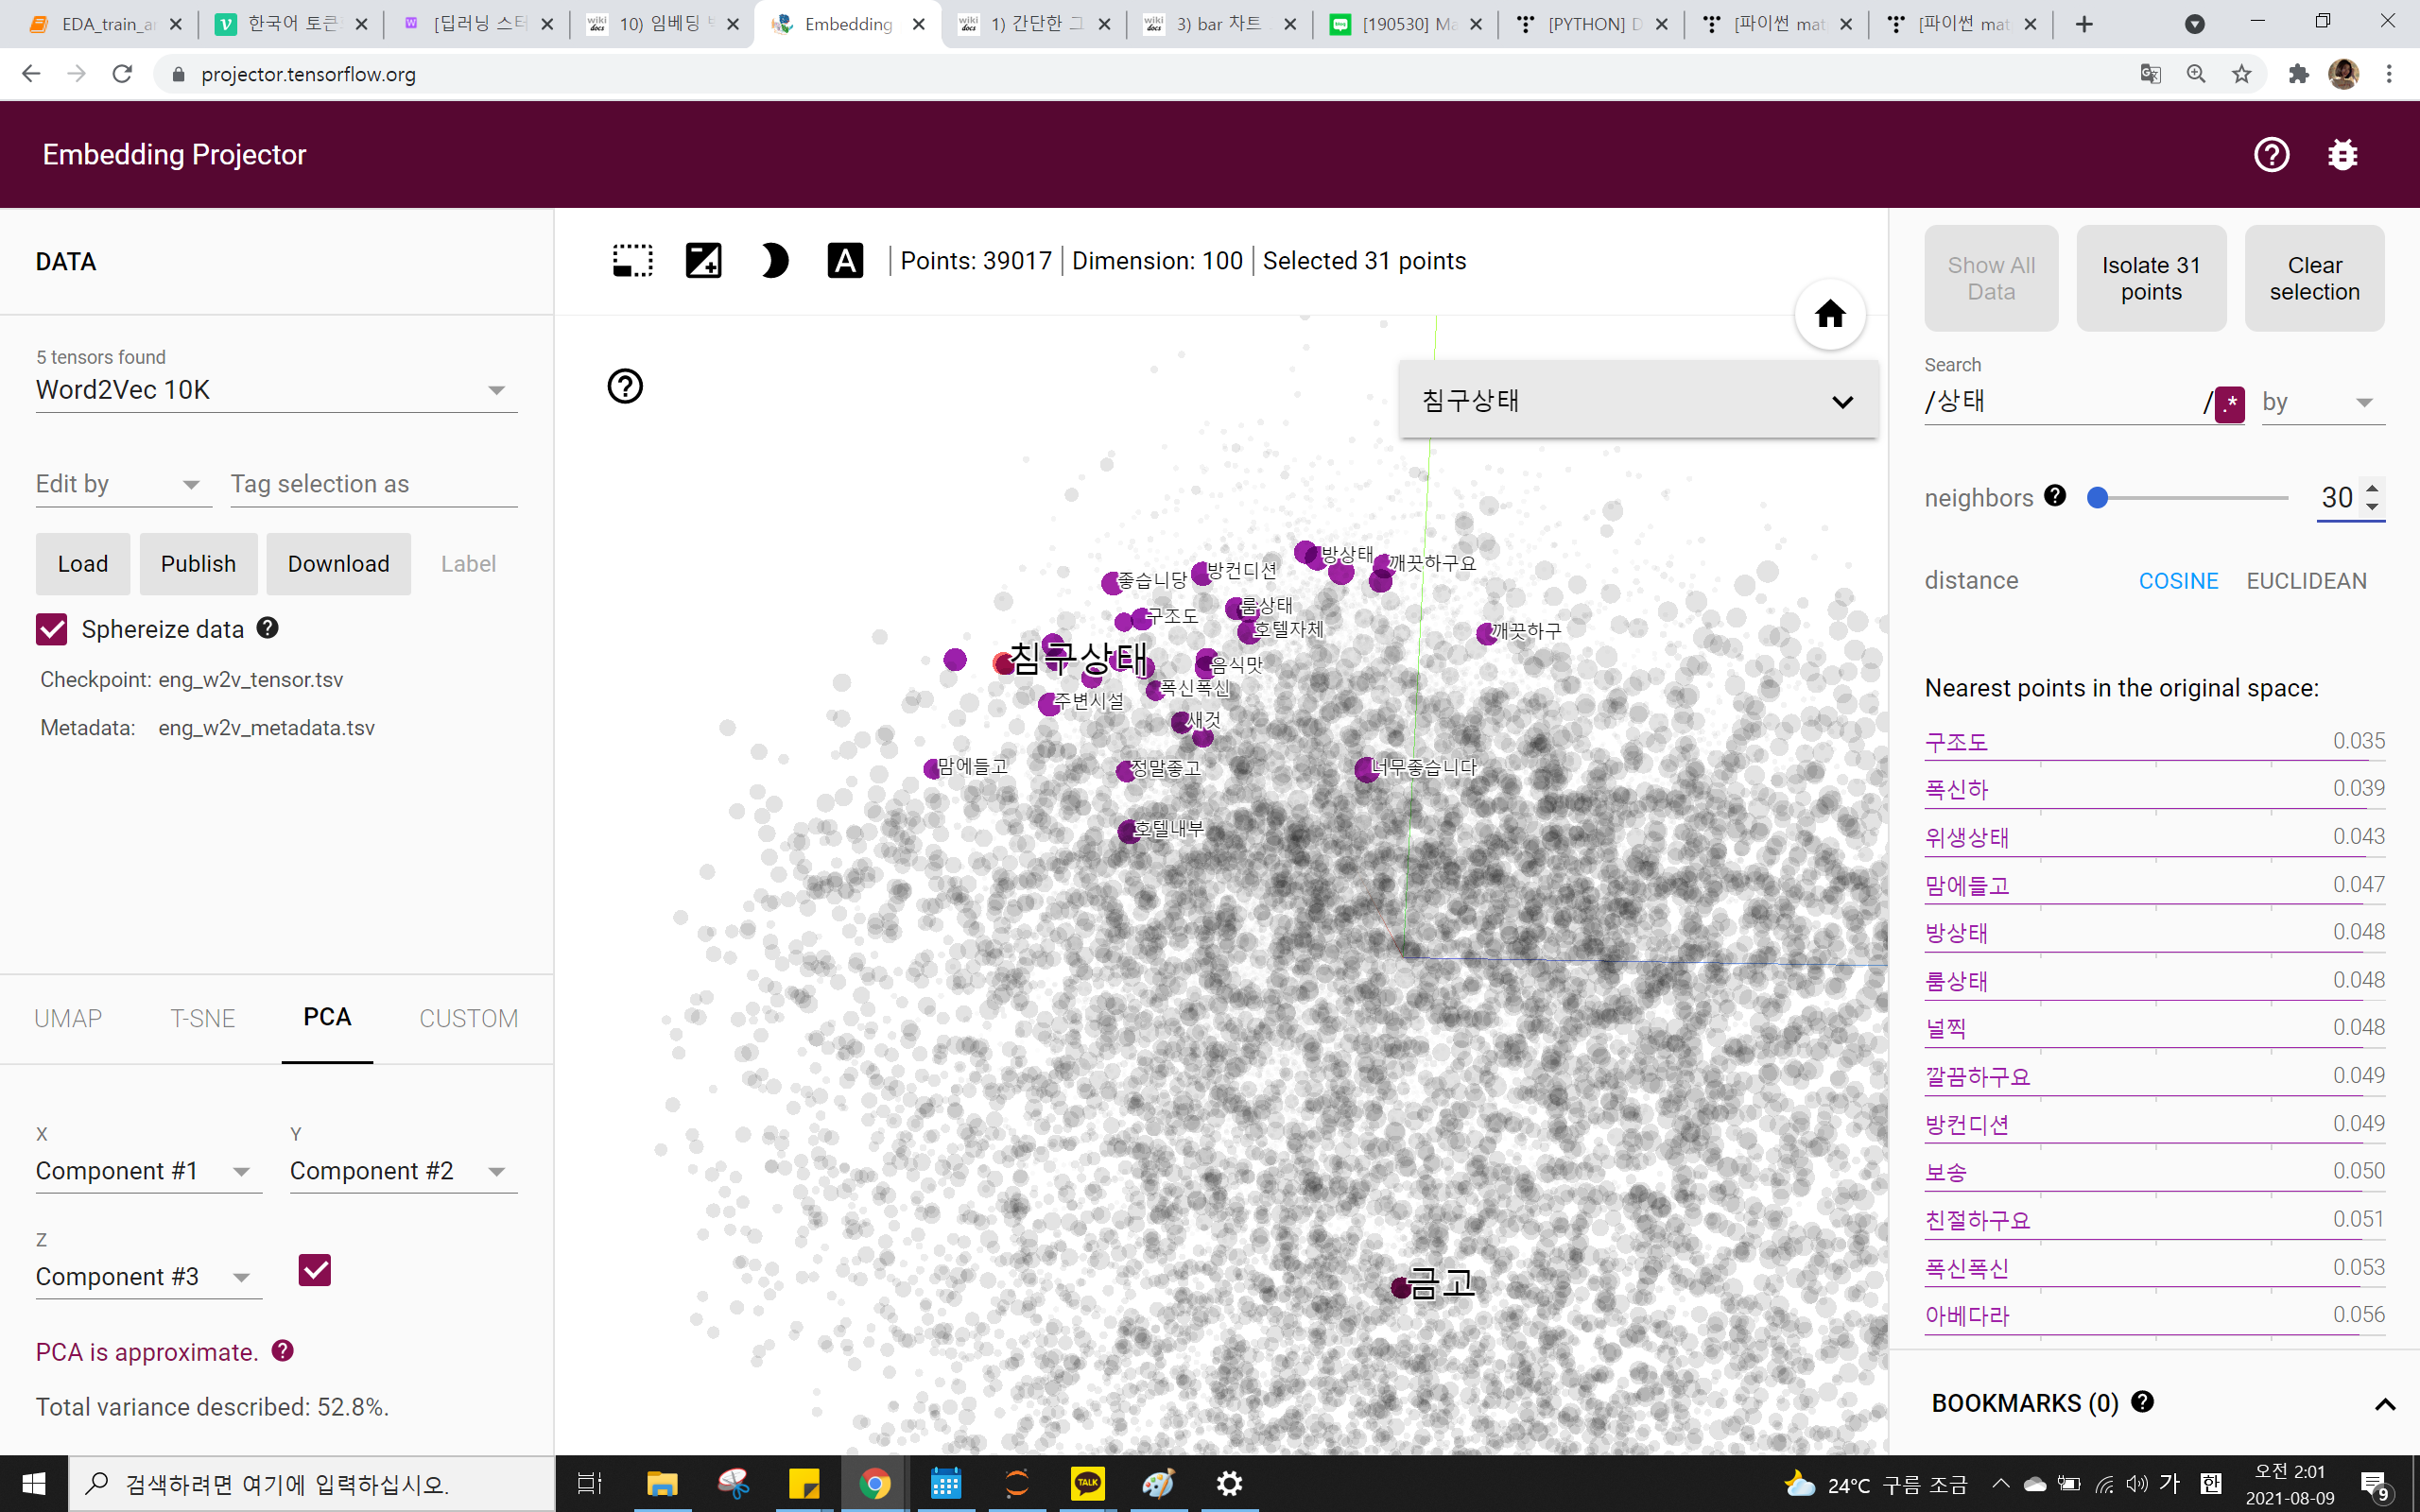

In [280]:
model_result = loaded_model.most_similar("침구상태")
print(model_result)
Image("./word_embeding/image/침구상태.png", width =800)

In [279]:
# 상태 검색하면 -> 침구상태 -> 푹신함/깨끗/ 위생
## 토픽0 은 서비스 그리고 고객이 느낀 부분에 더 초첨을 맞춤

<IPython.core.display.Image object>


<Topics>
| #0 (21012) : 침구 상태 응대 프론트 분위기 
| #1 (10345) : 바다 전망 오션 야경 아침 \
| #2 (13428) : 침대 욕조 화장실 어메니티 디럭스 \
| #3 (14740) : 수영장 사우나 수영 야외 관리 \
| #4 (19523) : 안내 인사 로비 미소 배려 \
| #5 (13608) : 청소 냄새 화장실 소리 먼지 \
| #6 (21232) : 주변 근처 거리 맛집 접근성 \
| #7 (13794) : 라운지 음식 클럽 뷔페 해피아워 \ 
| #8 (12496) : 주차 가격 주차장 가성 로비 \
| #9 (22114) : 고객 프론트 응대 요청 전화

 

## 토픽1의 단어들이 포함된 리뷰 개수 파악

In [323]:
sum_1 = 0;sum_2 = 0;sum_3=0;sum_4=0;sum_5=0
topic1_1 = [];topic1_2 = [];topic1_3 = []; topic1_4 = []; topic1_5 = [] # 인덱스 리스트 

for i in df['number']:
    if '바다' in df.review_token[i]:
            #print(i, df.review[i], '\n')
            sum_1= sum_1 + 1
            topic1_1.append(i)
            
    if '전망' in df.review_token[i]:
            #print(i, df.review[i], '\n')
            sum_2 = sum_2 + 1
            topic1_2.append(i)
            
    if '오션' in df.review_token[i]:
            #print(i, df.review[i], '\n')
            sum_3 = sum_3 + 1
            topic1_3.append(i)            

    if '야경' in df.review_token[i]:
            #print(i, df.review[i], '\n')
            sum_4 = sum_4 + 1
            topic1_4.append(i)     

    if '아침' in df.review_token[i]:
            #print(i, df.review[i], '\n')
            sum_5 = sum_5 + 1
            topic1_5.append(i)     


# 각 토픽이 들어간 리뷰 개수 
print(sum_1)
print(sum_2)
print(sum_3)
print(sum_4)
print(sum_5)

207
364
8
271
338


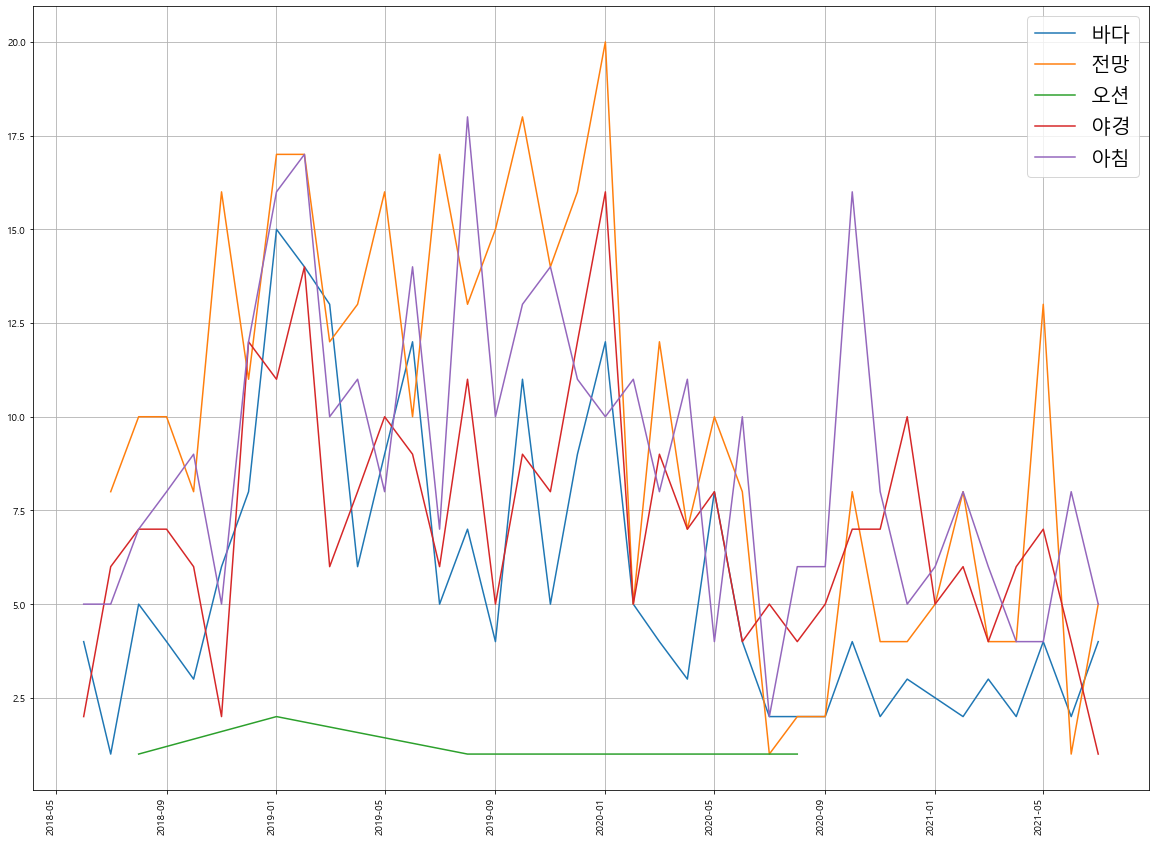

In [324]:
fig,ax = plt.subplots(figsize=(20,16))
plt.plot(df.iloc[topic1_1,:].groupby(['stay_date'])['review'].count(),label= '바다')
plt.plot(df.iloc[topic1_2,:].groupby(['stay_date'])['review'].count(),label= '전망')
plt.plot(df.iloc[topic1_3,:].groupby(['stay_date'])['review'].count(),label= '오션')
plt.plot(df.iloc[topic1_4,:].groupby(['stay_date'])['review'].count(),label= '야경')
plt.plot(df.iloc[topic1_5,:].groupby(['stay_date'])['review'].count(),label= '아침')

plt.legend(fontsize =20)
fig.autofmt_xdate(rotation=90)
plt.grid(True)

# 화장실 욕실 욕조 리뷰 빈도 증감 비슷 


In [318]:
model_result = loaded_model.most_similar("침구")
print(model_result)
#Image("./word_embeding/image/.png", width =800) # 위드임베딩 이미지 캡쳐해서 저장하고 출력하는 코드 

[('침구류', 0.9372082352638245), ('베딩', 0.8860101103782654), ('침대', 0.8803080320358276), ('푹신', 0.8710086941719055), ('포근', 0.8628436923027039), ('꿀잠자', 0.86225825548172), ('매트리스', 0.8608431220054626), ('베개', 0.8597155809402466), ('잠자리', 0.856058657169342), ('침구상태', 0.8557325005531311)]


In [319]:
sum=0
for text in df.review:
    if '침대' in text:
        if '분위기' in text:
            print(np.where(df.review == text)[0][0], text,'\n')
            sum = sum +1 
print(sum)


515 우선 체크인때 부터 너무 좋습니다 직원들 친절하시고 숙련된 메뉴얼대로 움직여 주셔서 믿음이 갔습니다 시작이 좋으니 나머진 할 말이 없죠  다만 숙박 하시는 분들은 테라스 뷔페 말고 다른 레스토랑 이용하시는 것이 좋을 것 같습니다 서비스 청결도 가격 장소 침대의퀄리티 객실중 가격빼고 전부 아주 좋음으로 선정 했습니다 가격은 방이 너무 건조해 방에서 지내는게 조금 힘들었어요 수건 널어 놓고 잤어요 그런 수고로움이 있는 방에 가격치고는 비쌋다 생각합니다 아주 조금요 경치나 분위기는 두말 할것 없이 좋습니다 

539 뷰는 당연 최고이고 객실상태 침대 편안함 직원 친절 분위기 가격은 비싸지만 가격만큼 서비스받고 편히 쉴수있는 곳입니다 완전 추천해요 

563 가족과 함께 그랜드 스윗룸을 예약하고 연휴 당일 방문했어요 연휴라 사람이 많았는데 스윗룸 예약자는 클럽 라운지에서 따로 체크인을 도와 주셔서 대기 시간이 지루하지 않았답니다 대기하는 동안도 간단한 다과를 먹을 수 있고저는 민트차를 마셨는데 잎차가 참 좋았어요 저녁도 같은 곳에서 먹었는데 분위기가 참 즐겁고 음식도 깔끔하고 다양해서 기대이상이었답니다 객실은 1260호실 야경이 정말 멋져서 가족이 모두 침대에 앉아서 담소를 나누며 한참 바라봤어요  근처에 바로 남산공원둘레길이 있어서 아침에 운동겸 조깅하기도 좋고 사우나 수영장 헬쓰클럽 시설들을 모두 사용할 수 있어서 연휴를 호텔에서 보낼 떄는 꼭 추천하고 싶은 장소예요  

870 조용하고 깨끗한 분위기가 마음에 들어요 직원분들도 친절하고 웃는 모습이 보기 좋습니다 무엇보다 마음에 드는 건 침대 입니다 널찍하고 푹신하고 뽀송뽀송한 느낌에 깊은 잠을 잘 수 있었습니다 화장실도 대 만족입니다 물론 다시 와야죠 

1111 좋아요 시설 깨끗하고 직원들 친절하고 침대가 매우 큽니다 모실 수영장 물과 실내가 따뜻해서 아가들 놀기 좋아요 탐모라 찜질방도 애들이 맘껏 뛰어 놀 수 있는 분위기라 우리 아가 엄청 좋아했어요 SKY ON 5 DINING 전반적으로 맛있어요 저

## 토픽2의 특정 단어가 포함된 리뷰 개수 파악 

In [325]:
sum_1 = 0;sum_2 = 0;sum_3=0;sum_4=0;sum_5=0
topic2_1 = [];topic2_2 = [];topic2_3 = []; topic2_4 = []; topic2_5 = [] # 인덱스 리스트 

for i in df['number']:
    if '침대' in df.review_token[i]:
            #print(i, df.review[i], '\n')
            sum_1= sum_1 + 1
            topic2_1.append(i)
            
    if '욕조' in df.review_token[i]:
            #print(i, df.review[i], '\n')
            sum_2 = sum_2 + 1
            topic2_2.append(i)
            
    if '화장실' in df.review_token[i]:
            #print(i, df.review[i], '\n')
            sum_3 = sum_3 + 1
            topic2_3.append(i)            

    if '어메니티' in df.review_token[i]:
            #print(i, df.review[i], '\n')
            sum_4 = sum_4 + 1
            topic2_4.append(i)     

    if '디럭스' in df.review_token[i]:
            #print(i, df.review[i], '\n')
            sum_5 = sum_5 + 1
            topic2_5.append(i)     


# 각 토픽이 들어간 리뷰 개수 
print(sum_1)
print(sum_2)
print(sum_3)
print(sum_4)
print(sum_5)

827
307
458
475
112


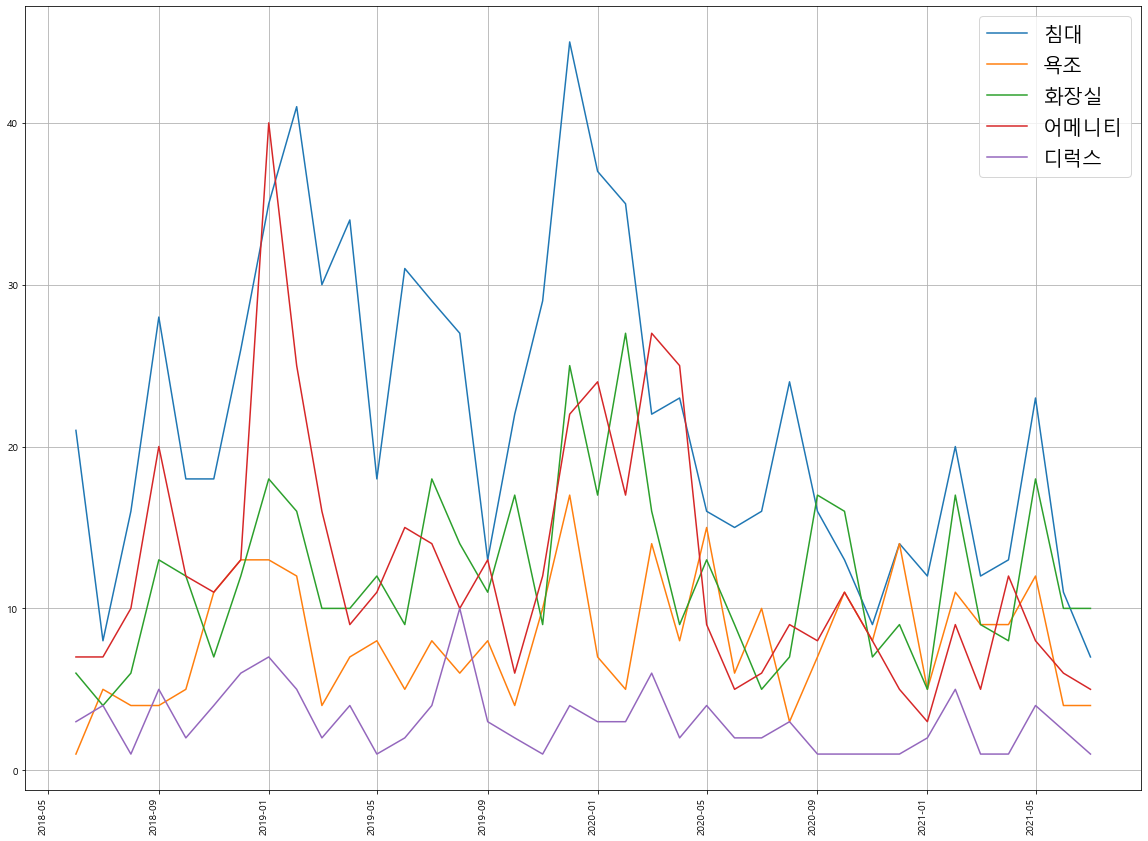

In [326]:
fig,ax = plt.subplots(figsize=(20,16))
plt.plot(df.iloc[topic2_1,:].groupby(['stay_date'])['review'].count(),label= '침대')
plt.plot(df.iloc[topic2_2,:].groupby(['stay_date'])['review'].count(),label= '욕조')
plt.plot(df.iloc[topic2_3,:].groupby(['stay_date'])['review'].count(),label= '화장실')
plt.plot(df.iloc[topic2_4,:].groupby(['stay_date'])['review'].count(),label= '어메니티')
plt.plot(df.iloc[topic2_5,:].groupby(['stay_date'])['review'].count(),label= '디럭스')

plt.legend(fontsize =20)
fig.autofmt_xdate(rotation=90)
plt.grid(True)
# 직원의 응대와 고객의 요청


In [327]:
sum=0
for text in df.review:
    if '요청' in text:
        if '전화' in text:
            print(np.where(df.review == text)[0][0], text,'\n')
            sum = sum +1 
print(sum)

# 요청 관련 -> 코로나 이전 이후 요청사항 변경 되었나? 
# 요청 리뷰 읽고 정리 해야 하나..

56 룸 컨디션이나 이그제큐티브 라운지 음식 상태포시즌 하야트 롯데 신라 호텔 보다 우위 괜찮았습니다 다만 일부 호텔들과 비교해 체크인 시간이 늦고 체크아웃 시간이 빠른점이 힘든 부분이였습니다 레이트 체크아웃을 요청 했으나 성수기 시즌이라 할수없었습니다 11시 체크아웃시 수많은 고객들이 한꺼번에 데스크에 몰리고 정신없는 상황이고 직원들 또한 한번에 많은 고객을 응대하다보니 지치거나 당황하는 모습이 보였습니다 프리미엄 브랜드인 콘래드와는 어울리지 않았습니다 차후 프리미엄 브랜드 이미지 고수를 위해서는 이부분 꼭 개선이 필요하다고 생각합니다 또한 아마추어같은 태도를 보이는 직원 분들이 간혹 있어서 참고 부탁드립니다 추가적으로 37그릴앤바를 이용했는데 9시쯤 입장하였고 주문 마감이 9시30분이라 급하게 다가와 굳은 표정으로 주문 하시겠습니까 라고 말하는 모습이 썩 좋아 보이지는 않았습니다 정확한 정보를 알지 못하고 간상황에서 무엇을 먹을지 준비도 되지 않았는데 다짜고짜 주문 해라는 말에 당황 스러웠습니다 음식의 맛은 좋았습니다 그리고 체크인 시간이 남아 짐을 올려달라고 부탁했는데 라운지 이용후 17시 이후까지 짐을 받지 못했습니다 전화를 5통 이상 하였고 라운지 직원에게도 문의 하여습니다 순차적으로 직행중이라 기다려달라는 말만 반복하였고 피드백 콜 또한 없었습니다 일정에 상당한 차질이 생겼지만 이후 서비스 또한 없었습니다 이부분 정말 실망 했습니다 처음 콘래드에 숙박하게 되었는데 룸 업그레이드 및 이그제큐티브 라운지 푸드가 타 브랜드에 비해 너무 좋았고 몇몇 직원 분들의 미소에 대부분 만족하며 이용하였습니다 

82 생일기념 1박 기본룸 시티뷰 트윈 조식 포함  위치 굿 여의도역에서 밖에 안나가고 지하도로 이동가능 쪼끔멀긴함  룸컨디션 굿 역시 콘래드 하드웨어로는 국내탑  전망 굿 예약시 한강뷰가 더 비싼데 파크원공사중이라 돈더낼 가치를 못느낌 솔직히말하면 한강뷰공사판뷰보느니 그냥 시티뷰가 나아보임  방문전날 생일이라고 코멘트 남겼더니 콘래드베어랑 케잌을 준다 하셔

## 토픽3의 특정 단어가 포함된 리뷰 개수 파악

In [328]:
sum_1 = 0;sum_2 = 0;sum_3=0;sum_4=0;sum_5=0
topic3_1 = [];topic3_2 = [];topic3_3 = []; topic3_4 = []; topic3_5 = [] # 인덱스 리스트 

for i in df['number']:
    if '수영장' in df.review_token[i]:
            #print(i, df.review[i], '\n')
            sum_1= sum_1 + 1
            topic2_1.append(i)
            
    if '사우나' in df.review_token[i]:
            #print(i, df.review[i], '\n')
            sum_2 = sum_2 + 1
            topic2_2.append(i)
            
    if '수영' in df.review_token[i]:
            #print(i, df.review[i], '\n')
            sum_3 = sum_3 + 1
            topic2_3.append(i)            

    if '야외' in df.review_token[i]:
            #print(i, df.review[i], '\n')
            sum_4 = sum_4 + 1
            topic2_4.append(i)     

    if '관리' in df.review_token[i]:
            #print(i, df.review[i], '\n')
            sum_5 = sum_5 + 1
            topic2_5.append(i)     


# 각 토픽이 들어간 리뷰 개수 
print(sum_1)
print(sum_2)
print(sum_3)
print(sum_4)
print(sum_5)

892
224
91
49
232


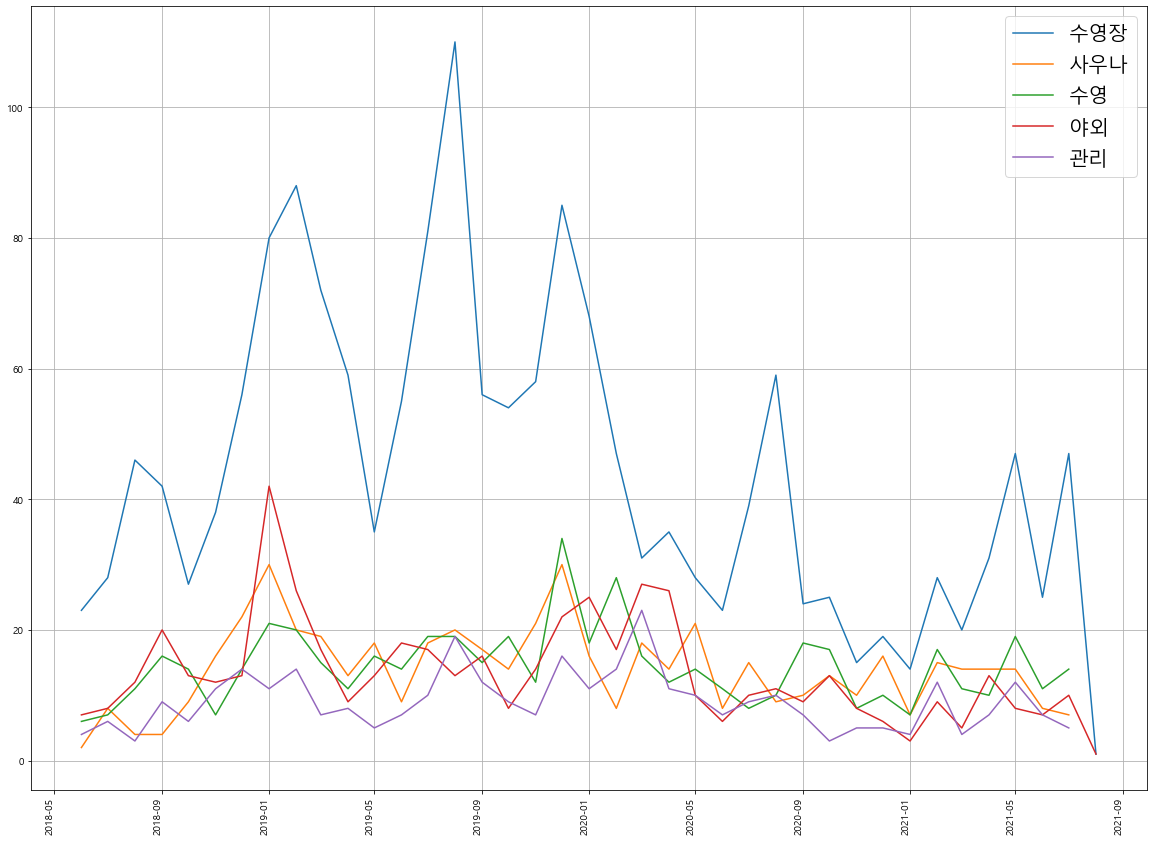

In [329]:
fig,ax = plt.subplots(figsize=(20,16))
plt.plot(df.iloc[topic2_1,:].groupby(['stay_date'])['review'].count(),label= '수영장')
plt.plot(df.iloc[topic2_2,:].groupby(['stay_date'])['review'].count(),label= '사우나')
plt.plot(df.iloc[topic2_3,:].groupby(['stay_date'])['review'].count(),label= '수영')
plt.plot(df.iloc[topic2_4,:].groupby(['stay_date'])['review'].count(),label= '야외')
plt.plot(df.iloc[topic2_5,:].groupby(['stay_date'])['review'].count(),label= '관리')

plt.legend(fontsize =20)
fig.autofmt_xdate(rotation=90)
plt.grid(True)
# 직원의 응대와 고객의 요청

In [330]:
model_result = loaded_model.most_similar("수영장")
print(model_result)

[('실내수영장', 0.8365700840950012), ('피트니스', 0.8293983340263367), ('사우나', 0.8206056952476501), ('헬스장', 0.808034360408783), ('야외수영장', 0.7845029234886169), ('루프탑', 0.7718464732170105), ('실외', 0.7682960033416748), ('센터', 0.7542482018470764), ('따뜻해서', 0.749789297580719), ('실내', 0.7497725486755371)]
